<a href="https://colab.research.google.com/github/EmnaRajhi/AtelierWeb/blob/main/Smart_Trading_Agent_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
import random
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go
from scipy.stats import zscore
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
import ipywidgets as widgets
from IPython.display import display
from statsmodels.tsa.stattools import adfuller, kpss
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



#DATA UNDERSTANDING AND ACQUISITION

##DATA IMPORTATION AND CONCATENATION


In [ ]:
# List of file paths
file_paths = [
    'UBCI Historical Data.csv',
    'TJL Historical Data.csv',
    'ASSMA Historical Data.csv',
    'SMG Historical Data.csv',
    'BIAT Historical Data.csv',
    'SOTE Historical Data.csv',
    'WIFAK Historical Data.csv',
    'TLNET Historical Data.csv',
    'AST Historical Data.csv',
    'CITY Historical Data.csv',
    'SOMOC Historical Data.csv',
    'UMED Historical Data.csv',
    'STAR Historical Data.csv',
    'DH Historical Data.csv',
    'ICF Historical Data.csv',
    'SAH Historical Data.csv',
    'ATL Historical Data.csv',
    'STPIL Historical Data.csv',
    'SIAM Historical Data.csv',
    'LNDOR Historical Data.csv'
]

# Create a list of DataFrames by reading each CSV file
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the DataFrames into one DataFrame
data = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(data.head())


         Date Valeur  Price  Open  High   Low   Vol. Change %
0  09/21/2023   UBCI   20.5  20.5  20.5  20.5    NaN  -10.48%
1  09/15/2023   UBCI   22.9  22.9  22.9  22.9  0.08K    0.00%
2  09/14/2023   UBCI   22.9  22.9  22.9  22.9  0.30K   -0.43%
3  09/04/2023   UBCI   23.0  23.0  23.0  23.0  2.60K    0.00%
4  09/01/2023   UBCI   23.0  23.0  23.0  23.0  1.67K    0.44%


#Exploratory data analysis


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12174 entries, 0 to 12173
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      12174 non-null  object 
 1   Valeur    12174 non-null  object 
 2   Price     12174 non-null  float64
 3   Open      12174 non-null  float64
 4   High      12174 non-null  float64
 5   Low       12174 non-null  float64
 6   Vol.      12155 non-null  object 
 7   Change %  12174 non-null  object 
dtypes: float64(4), object(4)
memory usage: 761.0+ KB


In [ ]:
data.shape

(12174, 8)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', format='%m/%d/%Y')  # Adjust based on your date format

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12174 entries, 0 to 12173
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      12174 non-null  datetime64[ns]
 1   Valeur    12174 non-null  object        
 2   Price     12174 non-null  float64       
 3   Open      12174 non-null  float64       
 4   High      12174 non-null  float64       
 5   Low       12174 non-null  float64       
 6   Vol.      12155 non-null  object        
 7   Change %  12174 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 761.0+ KB


In [ ]:
data.describe()

Price          Open          High           Low
count  12174.000000  12174.000000  12174.000000  12174.000000
mean      24.156088     24.119924     24.256547     23.986844
std       32.782347     32.742521     32.892560     32.603856
min        0.690000      0.680000      0.700000      0.680000
25%        6.252500      6.250000      6.300000      6.200000
50%        9.615000      9.600000      9.660000      9.550000
75%       20.000000     20.000000     20.000000     20.000000
max      174.900000    174.900000    174.900000    174.900000

In [ ]:
# Sort DataFrame by 'Date'
data = data.sort_values(by='Date')

data.head()

Date Valeur  Price   Open   High    Low   Vol. Change %
2540 2020-01-02   BIAT  53.58  54.05  54.05  53.58  5.19K   -1.31%
2539 2020-01-03   BIAT  53.34  53.57  53.81  53.34  8.66K   -0.44%
2538 2020-01-06   BIAT  53.10  53.34  53.34  53.10  3.94K   -0.46%
2537 2020-01-07   BIAT  52.91  53.33  53.33  52.86  1.02K   -0.36%
2536 2020-01-08   BIAT  52.86  52.93  52.95  52.86  3.55K   -0.09%

In [ ]:
print(data.isnull().sum())

Date         0
Valeur       0
Price        0
Open         0
High         0
Low          0
Vol.        19
Change %     0
dtype: int64


In [ ]:
data.duplicated().sum()

0

In [ ]:
# Function to clean and convert 'Vol.' values to numeric
def clean_vol(vol_str):
    vol_str = str(vol_str)  # Convert to string to handle non-string values
    if 'K' in vol_str:
        return float(vol_str.replace('K', '')) * 1000
    elif 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1000000
    else:
        return float(vol_str)

In [ ]:
# Create 'Volume' column based on cleaned 'Vol.' values
data['Volume'] = data['Vol.'].apply(clean_vol)

# Display the updated DataFrame
print(data)

           Date Valeur  Price   Open   High    Low   Vol. Change %  Volume
2540 2020-01-02   BIAT  53.58  54.05  54.05  53.58  5.19K   -1.31%  5190.0
2539 2020-01-03   BIAT  53.34  53.57  53.81  53.34  8.66K   -0.44%  8660.0
2538 2020-01-06   BIAT  53.10  53.34  53.34  53.10  3.94K   -0.46%  3940.0
2537 2020-01-07   BIAT  52.91  53.33  53.33  52.86  1.02K   -0.36%  1020.0
2536 2020-01-08   BIAT  52.86  52.93  52.95  52.86  3.55K   -0.09%  3550.0
...         ...    ...    ...    ...    ...    ...    ...      ...     ...
1524 2024-01-15   BIAT  89.01  88.50  89.50  88.50  5.98K    0.58%  5980.0
1523 2024-01-16   BIAT  90.25  89.50  90.30  89.50  6.72K    1.39%  6720.0
1522 2024-01-17   BIAT  90.00  90.30  90.30  89.86  4.23K   -0.28%  4230.0
1521 2024-01-18   BIAT  89.65  90.00  90.00  89.60  8.19K   -0.39%  8190.0
1520 2024-01-19   BIAT  89.90  89.95  89.95  89.50  0.43K    0.28%   430.0

[12174 rows x 9 columns]


In [ ]:
# Assuming 'Date' column is already in datetime format
desired_date = pd.to_datetime('2021-03-30')

# Select the row(s) for the desired date
desired_row = data[data['Date'] == desired_date]

# Display the row(s)
print(desired_row)

            Date  Valeur  Price   Open   High    Low    Vol. Change %  \
4279  2021-03-30  TELNET   8.63   8.68   8.68   8.55  12.77K   -0.58%   
7800  2021-03-30  DELICE  14.70  14.51  14.70  14.50  22.10K    0.00%   
6665  2021-03-30    UMED   8.59   8.40   8.65   8.40   0.63K    1.06%   
8522  2021-03-30     ICF  71.75  67.49  71.78  67.49   2.57K   -0.04%   
258   2021-03-30    UBCI  21.00  21.63  21.63  21.00   2.31K    0.00%   
5919  2021-03-30   SOMOC   1.10   1.10   1.12   1.08   5.15M    1.85%   
3615  2021-03-30   WIFAK   6.79   6.79   6.79   6.79   0.50K    0.00%   
10664 2021-03-30   STPIL  11.82  11.82  11.82  11.82   3.11K    0.00%   
9991  2021-03-30     ATL   1.64   1.65   1.65   1.61   1.53M   -2.38%   
9278  2021-03-30     SAH  10.13  10.13  10.14  10.11  60.55K   -0.08%   
1431  2021-03-30     SMG  17.75  17.75  17.75  17.75   1.00K    0.00%   
3158  2021-03-30    SOTE   3.75   3.75   3.75   3.65   5.37K    1.35%   
12051 2021-03-30   LNDOR   8.43   8.49   8.49   8.4

In [ ]:
data.drop(columns=['Vol.'], inplace=True)

In [ ]:
# Supprimer tous les caractères "%" de la colonne "Change %"
data['Change %'] = data['Change %'].str.replace('%', '')

# Convertir la colonne "Change %" en type numérique (int)
data['Change %'] = data['Change %'].astype(float)

In [ ]:
data.head()

Date Valeur  Price   Open   High    Low  Change %  Volume
2540 2020-01-02   BIAT  53.58  54.05  54.05  53.58     -1.31  5190.0
2539 2020-01-03   BIAT  53.34  53.57  53.81  53.34     -0.44  8660.0
2538 2020-01-06   BIAT  53.10  53.34  53.34  53.10     -0.46  3940.0
2537 2020-01-07   BIAT  52.91  53.33  53.33  52.86     -0.36  1020.0
2536 2020-01-08   BIAT  52.86  52.93  52.95  52.86     -0.09  3550.0

In [ ]:
data.to_csv('datasorted.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12174 entries, 2540 to 1520
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      12174 non-null  datetime64[ns]
 1   Valeur    12174 non-null  object        
 2   Price     12174 non-null  float64       
 3   Open      12174 non-null  float64       
 4   High      12174 non-null  float64       
 5   Low       12174 non-null  float64       
 6   Change %  12174 non-null  float64       
 7   Volume    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 856.0+ KB


In [ ]:
data.corr().T

<ipython-input-314-e688ef74ff4b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price      Open      High       Low  Change %    Volume
Price     1.000000  0.999894  0.999952  0.999924  0.014470 -0.074442
Open      0.999894  1.000000  0.999934  0.999934  0.010011 -0.074424
High      0.999952  0.999934  1.000000  0.999883  0.012537 -0.074347
Low       0.999924  0.999934  0.999883  1.000000  0.011605 -0.074472
Change %  0.014470  0.010011  0.012537  0.011605  1.000000  0.028241
Volume   -0.074442 -0.074424 -0.074347 -0.074472  0.028241  1.000000

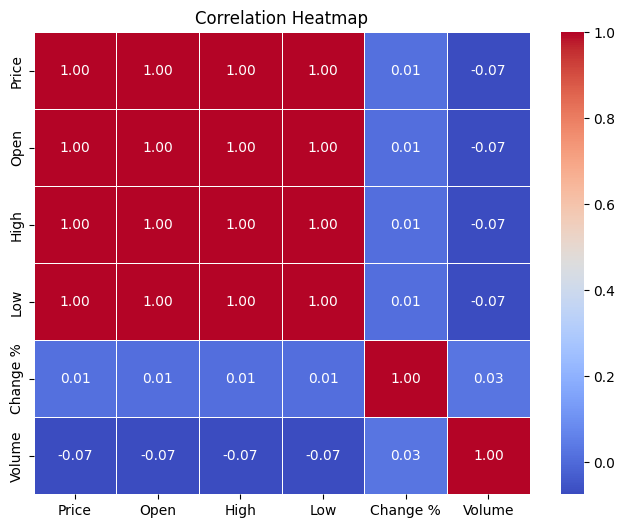

In [ ]:
# Assuming your DataFrame is named 'data'
# Selecting only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['float64']).columns
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#DATA VISUALISATION

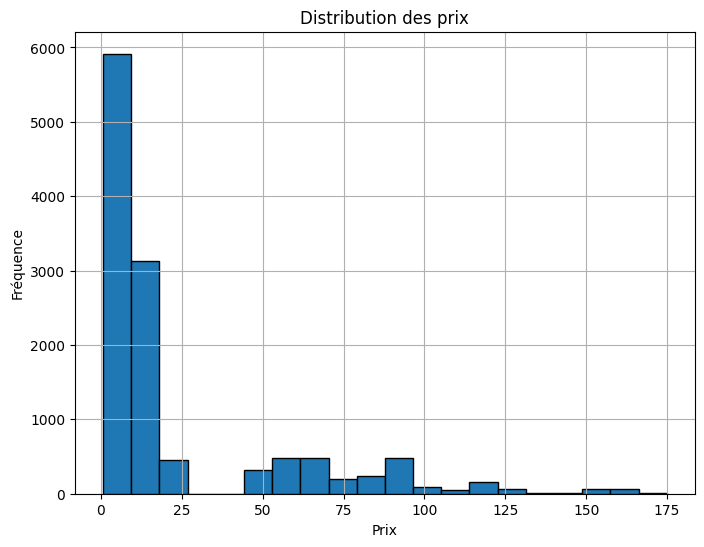

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=20, edgecolor='black')
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def update_plot(selected_company, selected_feature):
    # Filter data for the selected company and feature
    selected_data = data[data['Valeur'] == selected_company][selected_feature]

    # Calculate skewness and kurtosis
    skewness = selected_data.skew()
    kurtosis = selected_data.kurtosis()

    # Create histogram
    plt.figure(figsize=(4, 4))
    plt.hist(selected_data, bins=20, edgecolor='black', alpha=0.5)
    plt.title(f"Distribution of {selected_feature} for {selected_company}")
    plt.xlabel(selected_feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Display skewness and kurtosis
    print(f'Skewness: {skewness}')
    print(f'Kurtosis: {kurtosis}')

# Dropdowns for selecting company and feature
company_selection = widgets.Dropdown(
    options=data['Valeur'].unique(),
    value=data['Valeur'].unique()[0],  # Set default value to the first company
    description='Select a Company:',
    disabled=False,
)

feature_selection = widgets.Dropdown(
    options=['Price', 'Open', 'High', 'Low'],
    value='Price',  # Set default value to 'Price'
    description='Select a Feature:',
    disabled=False,
)

# Display the dropdowns and register the function to be called when the dropdown values change
display(widgets.interactive(update_plot, selected_company=company_selection, selected_feature=feature_selection))


interactive(children=(Dropdown(description='Select a Company:', options=('BIAT', 'SOTE', 'UMED', 'DELICE', 'SA…

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
# Liste unique des entreprises
valeurs_uniques = data['Valeur'].unique()

# Tracer les graphiques pour chaque entreprise
for valeur in valeurs_uniques:
    # Filtrer le DataFrame pour l'entreprise actuelle
    df_valeur = data[data['Valeur'] == valeur]

    # Sélectionner les 100 dernières entrées de prix pour l'entreprise actuelle
    df_valeur_prix = df_valeur[['Open', 'High', 'Low','Price']]

    # Création du graphique
    fig = go.Figure()

    # Ajout des traces pour open, high, low, et close
    fig.add_trace(go.Scatter(x=df_valeur_prix.index, y=df_valeur_prix['Open'], name='Open'))
    fig.add_trace(go.Scatter(x=df_valeur_prix.index, y=df_valeur_prix['High'], name='High'))
    fig.add_trace(go.Scatter(x=df_valeur_prix.index, y=df_valeur_prix['Low'], name='Low'))
    fig.add_trace(go.Scatter(x=df_valeur_prix.index, y=df_valeur_prix['Price'], name='Price'))

    # Mise à jour des mises en page du graphique
    fig.update_layout(
        title=f'Prix pour {valeur}',
        xaxis_title='Date',
        yaxis_title='Prix',
        width=1000,  # Largeur de la figure
        height=600   # Hauteur de la figure
    )

    # Affichage du graphique
    fig.show()

# Moving Average Methodology

##Simple Moving Average

In [ ]:
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame with the required columns and 'Date' as the index

# Resample data by year and calculate yearly average
data_yearly = data.resample('Y').mean()

# Calculate SMA over a period of 10 and 20 years
data_yearly['SMA_10'] = data_yearly['Price'].rolling(window=10, min_periods=1).mean()
data_yearly['SMA_20'] = data_yearly['Price'].rolling(window=20, min_periods=1).mean()

# Create traces for each line
trace1 = go.Scatter(x=data_yearly.index, y=data_yearly['Price'], mode='lines', name='Yearly Average Price')
trace2 = go.Scatter(x=data_yearly.index, y=data_yearly['SMA_10'], mode='lines', name='10-year SMA')
trace3 = go.Scatter(x=data_yearly.index, y=data_yearly['SMA_20'], mode='lines', name='20-year SMA')

# Create layout
layout = go.Layout(title='Yearly Average Price and Simple Moving Averages (SMA)', xaxis=dict(title='Year'), yaxis=dict(title='Price'))

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show plot
fig.show()


<ipython-input-320-5560ed80c6d3>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



##Cumulative Moving Average





In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame with the required columns and 'Date' as the index

# Resample data by year and calculate yearly average
data_yearly = data.resample('Y').mean()

# Calculate SMA over a period of 10 and 20 years
data_yearly['SMA_10'] = data_yearly['Price'].rolling(window=10, min_periods=1).mean()
data_yearly['SMA_20'] = data_yearly['Price'].rolling(window=20, min_periods=1).mean()

# Calculate CMA
data_yearly['CMA'] = data_yearly['Price'].expanding().mean()

# Create traces for each line
trace1 = go.Scatter(x=data_yearly.index, y=data_yearly['Price'], mode='lines', name='Yearly Average Price')
trace2 = go.Scatter(x=data_yearly.index, y=data_yearly['SMA_10'], mode='lines', name='10-year SMA')
trace3 = go.Scatter(x=data_yearly.index, y=data_yearly['SMA_20'], mode='lines', name='20-year SMA')
trace4 = go.Scatter(x=data_yearly.index, y=data_yearly['CMA'], mode='lines', name='CMA')

# Create layout
layout = go.Layout(title='Yearly Average Price and Moving Averages', xaxis=dict(title='Year'), yaxis=dict(title='Price'))

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)

# Show plot
fig.show()


<ipython-input-321-b363d7af88e7>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



##Exponential Moving Average

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame with the required columns and 'Date' as the index

# Get unique values in the 'Valeur' column
unique_valeurs = data['Valeur'].unique()

# Create a separate plot for each valeur
for valeur in unique_valeurs:
    # Filter data for the current valeur
    valeur_data = data[data['Valeur'] == valeur]

    # Calculate EMA with smoothing factor 0.1
    valeur_data['EMA_0.1'] = valeur_data['Price'].ewm(alpha=0.1, adjust=False).mean()

    # Calculate EMA with smoothing factor 0.3
    valeur_data['EMA_0.3'] = valeur_data['Price'].ewm(alpha=0.3, adjust=False).mean()

    # Create traces for original data and EMAs
    trace_original = go.Scatter(x=valeur_data.index, y=valeur_data['Price'], mode='lines', name='Original Price', line=dict(color='green'))
    trace_ema_01 = go.Scatter(x=valeur_data.index, y=valeur_data['EMA_0.1'], mode='lines', name='EMA (alpha=0.1)', line=dict(color='red', dash='dash'))
    trace_ema_03 = go.Scatter(x=valeur_data.index, y=valeur_data['EMA_0.3'], mode='lines', name='EMA (alpha=0.3)', line=dict(color='yellow', dash='dash'))

    # Create figure
    fig = go.Figure([trace_original, trace_ema_01, trace_ema_03])

    # Customize layout
    fig.update_layout(
        title=f'Exponential Moving Averages (EMA) for {valeur}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend=dict(font=dict(size=12))
    )

    # Show plot
    fig.show()


<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-322-dab07c3d200c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-dab07c3d200c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#AutoCorrelation Function (ACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming 'data' is your DataFrame with 'Valeur', 'Date', 'Open', 'High', 'Low', and 'Price' columns

# Function to update ACF plot based on selected company and feature
def update_acf_plot(selected_company, selected_feature):
    # Clear previous plot
    with plot_output:
        clear_output(wait=True)

    # Filter data for the selected company
    feature_data = data[data['Valeur'] == selected_company][selected_feature]

    # ACF Plot
    plt.figure(figsize=(12, 6))
    plot_acf(feature_data)  # Adjust the number of lags as needed
    plt.title(f'Autocorrelation Function (ACF) for {selected_feature} - {selected_company}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Dropdown for selecting the company
company_selection = widgets.Dropdown(
    options=data['Valeur'].unique(),
    value=data['Valeur'].unique()[0],  # Set default value to the first company
    description='Choose a company:',
    disabled=False,
)

# Dropdown for selecting the feature
feature_selection = widgets.Dropdown(
    options=['Open', 'High', 'Low', 'Price'],
    value='Open',  # Set default value to 'Open'
    description='Choose a feature:',
    disabled=False,
)

# Output widget for displaying the ACF plot
plot_output = widgets.Output()

# Display the dropdowns and register the function to be called when the dropdown values change
display(widgets.interactive(update_acf_plot, selected_company=company_selection, selected_feature=feature_selection))


interactive(children=(Dropdown(description='Choose a company:', options=('BIAT', 'SOTE', 'UMED', 'DELICE', 'SA…

In [ ]:
import numpy as np
from scipy.stats import norm

# Assuming 'data' is your DataFrame containing the relevant data

# Function to calculate VaR and CVaR based on selected company and feature
def calculate_var_cvar(selected_company, selected_feature):
    # Clear previous output
    with output:
        output.clear_output(wait=True)

    # Filter data for the selected company and feature
    company_data = data[data['Valeur'] == selected_company][selected_feature]

    # Calculate returns
    returns = company_data.pct_change().dropna()

    # Estimate parameters (mean and standard deviation) of returns
    mu = returns.mean()
    sigma = returns.std()

    # Set confidence level and time horizon
    confidence_level = 0.95
    time_horizon = 1  # For daily VaR, time horizon is typically 1 day

    # Calculate VaR using the normal distribution
    VaR = norm.ppf(1 - confidence_level, mu, sigma) * np.sqrt(time_horizon)

    # Calculate CVaR (Expected Shortfall)
    CVaR = (1 / (1 - confidence_level)) * norm.pdf(norm.ppf(1 - confidence_level)) * sigma

    # Display VaR and CVaR for the selected company and feature
    with output:
        print(f"For {selected_company}, {selected_feature}:")
        print("VaR at 95% confidence level:", VaR)
        print("CVaR at 95% confidence level:", CVaR)
        print()

# Dropdown for selecting the company
company_selection = widgets.Dropdown(
    options=data['Valeur'].unique(),
    value=data['Valeur'].unique()[0],  # Set default value to the first company
    description='Choose a company:',
    disabled=False,
)

# Dropdown for selecting the feature
feature_selection = widgets.Dropdown(
    options=['Open', 'High', 'Low', 'Price'],  # Add more features as needed
    value='Price',  # Set default value to 'Price'
    description='Choose a feature:',
    disabled=False,
)

# Output widget for displaying VaR and CVaR
output = widgets.Output()

# Display the dropdowns and register the function to be called when the dropdown values change
display(widgets.interactive(calculate_var_cvar, selected_company=company_selection, selected_feature=feature_selection))
display(output)

interactive(children=(Dropdown(description='Choose a company:', options=('BIAT', 'SOTE', 'UMED', 'DELICE', 'SA…

Output()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import ipywidgets as widgets
from IPython.display import display, clear_output

# Get unique values in the 'valeur' column
unique_valeurs = data['Valeur'].unique()

# Dropdown widget for choosing valeur
dropdown_valeur = widgets.Dropdown(options=unique_valeurs, description='Choose valeur:')

# Container for plots
plot_output = widgets.Output()

# Function to update plots based on dropdown value
def update_plots(valeur):
    # Clear previous plots
    with plot_output:
        clear_output(wait=True)

    # Filter data for the selected valeur
    subset_data = data[data['Valeur'] == valeur]

    # Perform seasonal decomposition
    result = seasonal_decompose(subset_data['Price'], model='multiplicative', period=12)  # Adjust period if needed

    # Plot the decomposition
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(subset_data.index, subset_data['Price'], label='Original Data')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(subset_data.index, result.trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(subset_data.index, result.seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(subset_data.index, result.resid, label='Residual')
    plt.legend()

    plt.suptitle(f'Seasonal Decomposition of {valeur}')
    plt.show()

# Dropdown for selecting company
company_selection = widgets.Dropdown(
    options=data['Valeur'].unique(),
    value=data['Valeur'].unique()[0],  # Set default value to the first company
    description='Choose a company:',
    disabled=False,
)

# Display the dropdown and register the function to be called when the dropdown value changes
widgets.interactive(update_plots, valeur=company_selection)



interactive(children=(Dropdown(description='Choose a company:', options=('BIAT', 'SOTE', 'UMED', 'DELICE', 'SA…

#ARIMA model for time series


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame
# Iterate over unique values in 'Valeur'
for valeur in data['Valeur'].unique():
    # Filter data for the current valeur
    valeur_data = data[data['Valeur'] == valeur]['Price']

    # Fit ARIMA model
    model = ARIMA(valeur_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Extract residuals
    residuals = model_fit.resid

    # Make forecast
    forecast_steps = 36  # Forecast for 10 years (3650 days)
    forecast = model_fit.forecast(steps=forecast_steps)

    # Generate forecast index starting from the last date in the data and extending into the future
    forecast_index = pd.date_range(start=valeur_data.index[-1], periods=forecast_steps, freq=valeur_data.index.freq)

    # Create a Plotly figure
    fig = go.Figure()

    # Plot original data
    fig.add_trace(go.Scatter(x=valeur_data.index, y=valeur_data, mode='lines', name='Original Data', line=dict(color='blue')))

    # Plot forecasted values
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecast', line=dict(color='red')))

    # Update layout with title and labels
    fig.update_layout(title=f'ARIMA Forecast for {valeur}', xaxis_title='Time', yaxis_title='Price')

    # Show plot
    fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using z

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the 

#Data Preparation

In [ ]:
df=pd.read_csv("datasorted.csv")

In [ ]:
df.head()

Date Valeur  Price   Open   High    Low  Change %  Volume
0  2020-01-02   BIAT  53.58  54.05  54.05  53.58     -1.31  5190.0
1  2020-01-03   BIAT  53.34  53.57  53.81  53.34     -0.44  8660.0
2  2020-01-06   BIAT  53.10  53.34  53.34  53.10     -0.46  3940.0
3  2020-01-07   BIAT  52.91  53.33  53.33  52.86     -0.36  1020.0
4  2020-01-08   BIAT  52.86  52.93  52.95  52.86     -0.09  3550.0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)


In [ ]:
df.isnull().sum()

Valeur       0
Price        0
Open         0
High         0
Low          0
Change %     0
Volume      19
dtype: int64

In [ ]:
# Display rows with NaN values in the 'Volume' column along with their index dates
nan_values = df[df['Volume'].isnull()]
print(nan_values)

            Valeur   Price    Open    High     Low  Change %  Volume
Date                                                                
2022-01-22  TELNET    8.45    8.45    8.45    8.45      1.81     NaN
2022-01-22  DELICE   15.50   15.50   15.50   15.50      0.98     NaN
2022-01-22   ASSMA   62.80   62.80   62.80   62.80      0.03     NaN
2022-01-22     SMG   17.00   17.00   17.00   17.00      2.53     NaN
2022-01-22   SOMOC    0.82    0.82    0.82    0.82     -4.65     NaN
2022-01-22    SOTE    2.90    2.90    2.90    2.90      2.11     NaN
2022-01-22     ICF   90.00   90.00   90.00   90.00      1.15     NaN
2022-01-22     TJL   11.50   11.50   11.50   11.50     -3.85     NaN
2022-01-22     SAH   10.60   10.60   10.60   10.60     21.36     NaN
2022-01-22     ATL    1.95    1.95    1.95    1.95     -1.52     NaN
2022-01-22    UMED    7.90    7.90    7.90    7.90      5.33     NaN
2022-02-24   STPIL   13.73   13.73   13.73   13.73      0.22     NaN
2022-03-03    Star  107.10  107.10

Both forward fill and backfill methods can help preserve the temporal order of the data and maintain the overall structure of the time series

In [ ]:
# Forward fill missing values in 'Volume' column based on 'Valeur'
for valeur in df['Valeur'].unique():
    mask = df['Valeur'] == valeur
    df.loc[mask, 'Volume'] = df.loc[mask, 'Volume'].fillna(method='ffill')


In [ ]:
# Display rows with NaN values in the 'Volume' column along with their index dates
nan_values = df[df['Volume'].isnull()]
print(nan_values)

Empty DataFrame
Columns: [Valeur, Price, Open, High, Low, Change %, Volume]
Index: []


In [ ]:
# Assuming df is your DataFrame containing the data
filtered_data = df[(df.index == '2022-01-22') & (df['Valeur'] == 'TELNET')]
print(filtered_data)


            Valeur  Price  Open  High   Low  Change %  Volume
Date                                                         
2022-01-22  TELNET   8.45  8.45  8.45  8.45      1.81  1250.0


In [ ]:
# Group by 'Valeur' and calculate the sum of 'Volume' for each 'Valeur'
volume_sum = df.groupby('Valeur')['Volume'].sum().reset_index()

# Sort the DataFrame by the sum of volume in descending order
volume_sum_sorted = volume_sum.sort_values(by='Volume', ascending=False)

# Display the top 10 companies by volume
top_10_companies = volume_sum_sorted.head(10)
print(top_10_companies)

    Valeur      Volume
11   SOMOC  32684990.0
8      SAH  28401660.0
9     SIAM  11549640.0
2      ATL   8789280.0
19   WIFAK   8662850.0
18    UMED   5602710.0
12    SOTE   5334340.0
15  TELNET   4297520.0
5   DELICE   3968370.0
3     BIAT   3836970.0


In [ ]:
# Group by 'Valeur' and calculate the sum of 'Volume' for each 'Valeur'
volume_sum = data.groupby('Valeur')['Volume'].sum().reset_index()

# Sort the DataFrame by the sum of volume in descending order
volume_sum_sorted = volume_sum.sort_values(by='Volume', ascending=True)

# Display the top 10 companies by volume
top_10_companies = volume_sum_sorted.head(10)
print(top_10_companies)

   Valeur     Volume
10    SMG   216610.0
14   Star   322370.0
16    TJL   366950.0
6     ICF   434580.0
1     AST   446330.0
0   ASSMA   446940.0
17   UBCI   586630.0
13  STPIL   752520.0
7   LNDOR  2587960.0
4    City  3215470.0


In [ ]:
df.isnull().sum()

Valeur      0
Price       0
Open        0
High        0
Low         0
Change %    0
Volume      0
dtype: int64

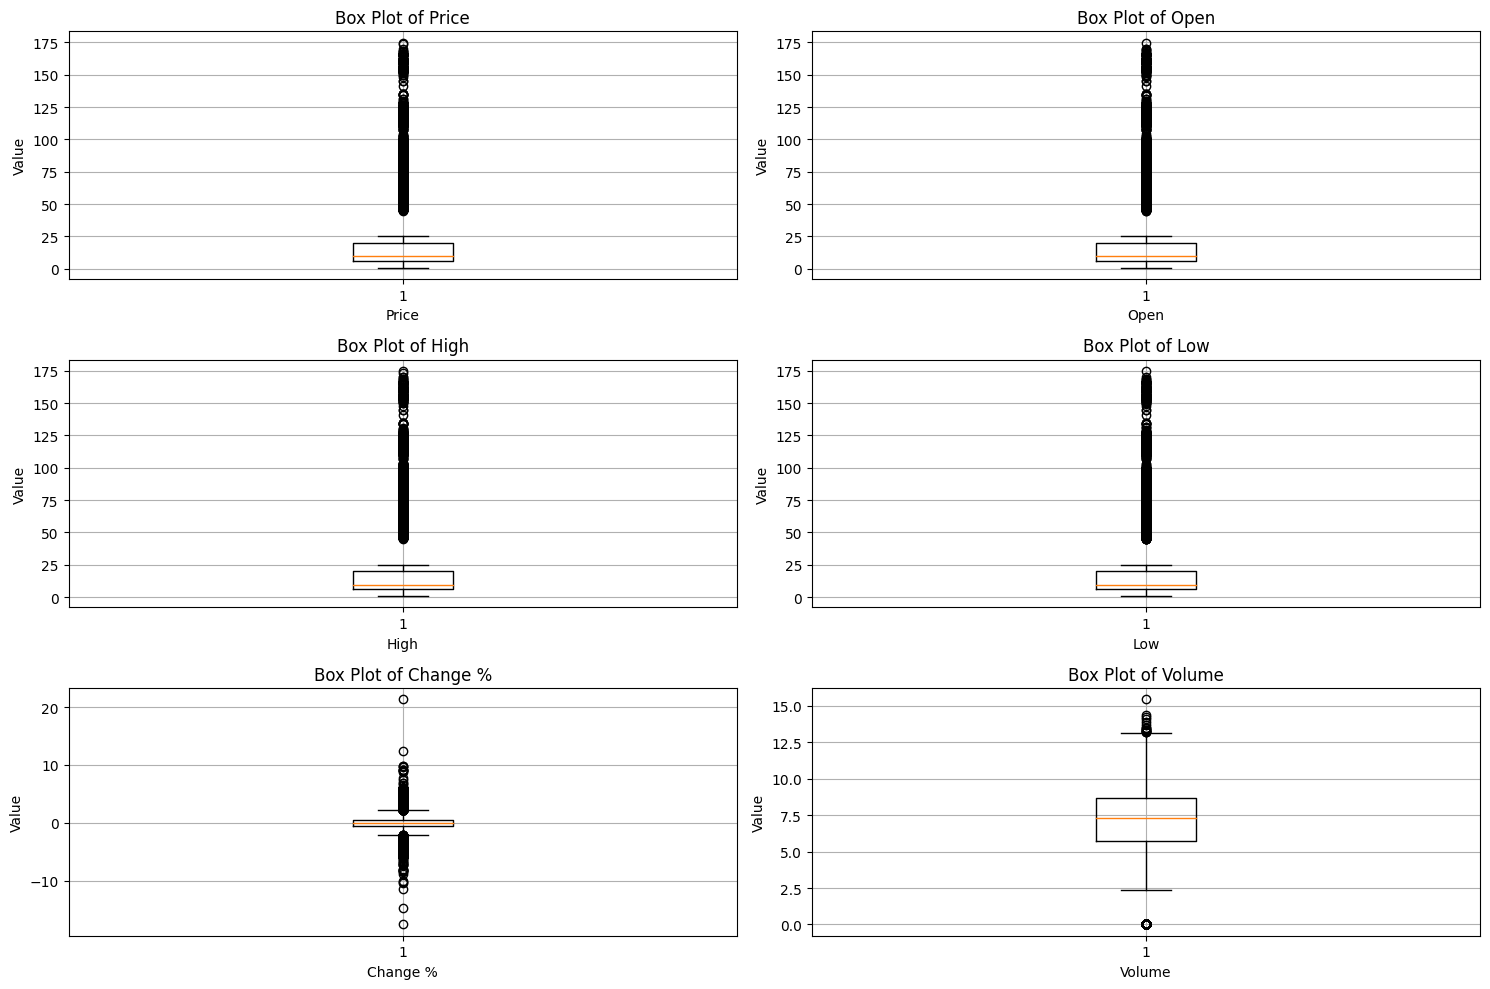

In [ ]:
# Select numerical columns for plotting
numerical_columns = ['Price', 'Open', 'High', 'Low', 'Change %', 'Volume']

# Create a box plot for each numerical column
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    if column == 'Volume':
        # Apply log transformation for 'Volume' data
        plt.boxplot(np.log(df[column] + 1))  # Adding 1 to avoid log(0)
    else:
        plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the interquartile range (IQR) for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the multiplier to adjust the range
outlier_multiplier = 1.5  # You can adjust this multiplier based on your data distribution

# Calculate the lower and upper bounds for outliers detection
lower_bound = Q1 - outlier_multiplier * IQR
upper_bound = Q3 + outlier_multiplier * IQR

# Find outliers based on the bounds
outliers = {}
for column in numerical_columns:
    outliers[column] = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]

# Print the outliers
for column, data in outliers.items():
    print(f"Outliers in column '{column}':")
    print(data)
    print("-" * 50)


Outliers in column 'Price':
           Valeur  Price   Open   High    Low  Change %  Volume
Date                                                           
2020-01-02   BIAT  53.58  54.05  54.05  53.58     -1.31  5190.0
2020-01-03   BIAT  53.34  53.57  53.81  53.34     -0.44  8660.0
2020-01-06   BIAT  53.10  53.34  53.34  53.10     -0.46  3940.0
2020-01-07   BIAT  52.91  53.33  53.33  52.86     -0.36  1020.0
2020-01-08   BIAT  52.86  52.93  52.95  52.86     -0.09  3550.0
...           ...    ...    ...    ...    ...       ...     ...
2024-01-15   BIAT  89.01  88.50  89.50  88.50      0.58  5980.0
2024-01-16   BIAT  90.25  89.50  90.30  89.50      1.39  6720.0
2024-01-17   BIAT  90.00  90.30  90.30  89.86     -0.28  4230.0
2024-01-18   BIAT  89.65  90.00  90.00  89.60     -0.39  8190.0
2024-01-19   BIAT  89.90  89.95  89.95  89.50      0.28   430.0

[2680 rows x 7 columns]
--------------------------------------------------
Outliers in column 'Open':
           Valeur  Price   Open   Hig

In [ ]:
# Define a function to count outliers based on the IQR method
def count_outliers_iqr(df):
    outliers_count = {}
    for column in df.columns:
        # Calculate the first and third quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        outliers_count[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    return outliers_count

# Count outliers in each numerical feature
outliers_count = count_outliers_iqr(df[numerical_columns])

# Print the number of outliers in each feature
print("Number of outliers in each feature:")
for feature, count in outliers_count.items():
    print(f"{feature}: {count}")

Number of outliers in each feature:
Price: 2680
Open: 2680
High: 2680
Low: 2680
Change %: 1744
Volume: 1524


In [ ]:
# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(data[numerical_columns]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (z_scores > threshold)

# Calculate the percentage of outliers for each feature
percentage_outliers = (outliers.sum(axis=0) / len(df)) * 100

# Interpretation
for feature, percentage in zip(df.columns, percentage_outliers):
    if percentage < 5:
        print(f"The percentage of outliers for {feature} is {percentage:.2f}%, which is within an acceptable range.")
    else:
        print(f"The percentage of outliers for {feature} is {percentage:.2f}%, which indicates potential issues in the data.")

The percentage of outliers for Valeur is 0.35%, which is within an acceptable range.
The percentage of outliers for Price is 0.35%, which is within an acceptable range.
The percentage of outliers for Open is 0.35%, which is within an acceptable range.
The percentage of outliers for High is 0.35%, which is within an acceptable range.
The percentage of outliers for Low is 0.10%, which is within an acceptable range.
The percentage of outliers for Change % is 0.11%, which is within an acceptable range.


In [ ]:
# Data Types Validation
print("Data Types Validation:")
print(df.dtypes)

# Ranges and Constraints Validation
print("\nRanges and Constraints Validation:")
# Example: Check if numeric columns are within specified ranges
numeric_columns = ['Price', 'Open', 'High', 'Low', 'Change %', 'Volume']
for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Min={min_val}, Max={max_val}")

# Missing Values Validation
print("\nMissing Values Validation:")
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Duplicates Validation
print("\nDuplicates Validation:")
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)



# Error Reporting
# You can log the errors, generate summary reports, or take appropriate actions based on the validation results.


Data Types Validation:
Valeur       object
Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
Volume      float64
dtype: object

Ranges and Constraints Validation:
Price: Min=0.69, Max=174.9
Open: Min=0.68, Max=174.9
High: Min=0.7, Max=174.9
Low: Min=0.68, Max=174.9
Change %: Min=-17.6, Max=21.36
Volume: Min=0.0, Max=5150000.0

Missing Values Validation:
Valeur      0
Price       0
Open        0
High        0
Low         0
Change %    0
Volume      0
dtype: int64

Duplicates Validation:
           Valeur   Price    Open    High     Low  Change %  Volume
Date                                                               
2020-10-13    AST   57.98   57.98   57.98   57.98      0.83    20.0
2020-10-19  WIFAK    6.50    6.50    6.50    6.50      0.00   250.0
2020-11-03    AST   57.98   57.98   57.98   57.98      0.00    10.0
2020-12-10    AST   59.00   59.00   59.00   59.00      0.00    20.0
2020-12-18  STPIL   12.00   12.00   12.00   12.00  

In [ ]:
# Define a function to calculate the percentage of outliers in the dataset based on the IQR method
def percentage_of_outliers_iqr(df):
    total_data_points = df.shape[0] * df.shape[1]  # Total number of data points
    total_outliers = 0

    for column in df.columns:
        # Calculate the first and third quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        total_outliers += ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    # Calculate the percentage of outliers
    percentage_outliers = (total_outliers / total_data_points) * 100

    return percentage_outliers

# Calculate the percentage of outliers in the dataset
percentage_outliers = percentage_of_outliers_iqr(data[numerical_columns])

# Print the percentage of outliers in the dataset
print("Percentage of outliers in the dataset:", percentage_outliers)

Percentage of outliers in the dataset: 5.0524934383202105


In [ ]:
df.shape

(12174, 7)

In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume
Date                                                           
2020-01-02   BIAT  53.58  54.05  54.05  53.58     -1.31  5190.0
2020-01-03   BIAT  53.34  53.57  53.81  53.34     -0.44  8660.0
2020-01-06   BIAT  53.10  53.34  53.34  53.10     -0.46  3940.0
2020-01-07   BIAT  52.91  53.33  53.33  52.86     -0.36  1020.0
2020-01-08   BIAT  52.86  52.93  52.95  52.86     -0.09  3550.0

In [ ]:
# Select numerical columns for plotting
numerical_columns = ['Price', 'Open', 'High', 'Low', 'Change %', 'Volume']

# Dropdown widgets for selecting x and y features
x_feature_selection = widgets.Dropdown(options=numerical_columns, description='Select X Feature:')
y_feature_selection = widgets.Dropdown(options=numerical_columns, description='Select Y Feature:')

# Function to update scatter plot based on selected features
def update_scatter_plot(x_feature, y_feature):
    plt.figure(figsize=(12, 8))
    plt.scatter(data[x_feature], data[y_feature])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter Plot of {x_feature} vs. {y_feature}')
    plt.show()

# Display the dropdowns and register the function to be called when the dropdown values change

widgets.interactive(update_scatter_plot, x_feature=x_feature_selection, y_feature=y_feature_selection)

interactive(children=(Dropdown(description='Select X Feature:', options=('Price', 'Open', 'High', 'Low', 'Chan…

In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume
Date                                                           
2020-01-02   BIAT  53.58  54.05  54.05  53.58     -1.31  5190.0
2020-01-03   BIAT  53.34  53.57  53.81  53.34     -0.44  8660.0
2020-01-06   BIAT  53.10  53.34  53.34  53.10     -0.46  3940.0
2020-01-07   BIAT  52.91  53.33  53.33  52.86     -0.36  1020.0
2020-01-08   BIAT  52.86  52.93  52.95  52.86     -0.09  3550.0

### Add the adjusted close feature by combining the dividend data

In [ ]:

def adjust_close(valeur, year, price):
    dividend = {
        ('ATL', 2021): 0.075,
        ('ATL', 2020): None,
        ('ATL', 2022): 0.200,
        ('ASSMA', 2021): 1.870,
        ('ASSMA', 2020): None,
        ('ASSMA', 2022): 2.210,
        ('TJL', 2021): 0.500,
        ('TJL', 2020): None,
        ('TJL', 2022): 1.200,
        ('BIAT', 2021): 5.000,
        ('BIAT', 2020): None,
        ('BIAT', 2022): 5.200,
        ('CITY', 2020): 0.600,
        ('CITY', 2021): 0.830,
        ('CITY', 2022): 1.250,
        ('AST', 2020): 6.000,
        ('AST', 2021): 2.800,
        ('AST', 2022): 2.800,
        ('WIFAK', 2020): None,
        ('WIFAK', 2021): None,
        ('WIFAK', 2022): None,
        ('ICF', 2020): 8.000,
        ('ICF', 2021): 1.500,
        ('ICF', 2022): 3.700,
        ('LNDOR', 2020): 0.180,
        ('LNDOR', 2021): 0.200,
        ('LNDOR', 2022): 0.500,
        ('SIAM', 2020): 0.120,
        ('SIAM', 2021): 0.120,
        ('SIAM', 2022): 0.180,
        ('SAH', 2020): 0.150,
        ('SAH', 2021): 0.230,
        ('SAH', 2022): 0.205,
        ('STPIL', 2020): 1.050,
        ('STPIL', 2021): 1.050,
        ('STPIL', 2022): 1.100,
        ('DH', 2020): 0.333,
        ('DH', 2021): 0.370,
        ('DH', 2022): 0.370,
        ('SOMOC', 2020): None,
        ('SOMOC', 2021): None,
        ('SOMOC', 2022): None,
        ('STAR', 2020): 3.820,
        ('STAR', 2021): 2.840,
        ('STAR', 2022): 3.650,
        ('SOTE', 2020): 0.100,
        ('SOTE', 2021): None,
        ('SOTE', 2022): None,
        ('SMG', 2020): 0.140,
        ('SMG', 2021): 0.150,
        ('SMG', 2022): 0.395,
        ('TLNET', 2020): 0.200,
        ('TLNET', 2021): 0.250,
        ('TLNET', 2022): 0.500,
        ('UBCI', 2020): None,
        ('UBCI', 2021): 1.000,
        ('UBCI', 2022): 0.750,
        ('UMED', 2020): None,
        ('UMED', 2021): 0.468,
        ('UMED', 2022): 0.406}


    if (valeur, year) in dividend:
        div = dividend[(valeur, year)]
        if div is None:
            return price
        else:
            return price - div
    else:
        return price

# Apply the adjust_close function to each row in the DataFrame
df['Adjusted_Close'] = df.apply(lambda row: adjust_close(row['Valeur'], row.name.year, row['Price']), axis=1)


In [ ]:
df_2021 = df[df.index.year == 2021]
df_2021.head(150)


Valeur  Price   Open   High    Low  Change %   Volume  \
Date                                                                
2021-01-04    UMED   9.55   9.60   9.60   9.55     -2.05   8420.0   
2021-01-04    SIAM   3.68   3.61   3.68   3.61     -0.98  12100.0   
2021-01-04     SAH   9.54   9.67   9.67   9.54     -0.98  23350.0   
2021-01-04    City   8.43   8.25   8.48   8.20      2.18   2300.0   
2021-01-04   LNDOR   7.20   7.15   7.20   7.15      1.84   2400.0   
...            ...    ...    ...    ...    ...       ...      ...   
2021-01-15    City   8.25   8.17   8.25   8.16      0.12   3100.0   
2021-01-15  DELICE  14.77  14.78  14.80  14.77     -0.07   2150.0   
2021-01-15   STPIL  12.00  12.10  12.10  12.00      0.84    680.0   
2021-01-15    BIAT  46.15  46.15  46.40  46.15      0.00   1510.0   
2021-01-15     AST  59.50  59.50  59.50  59.50      0.00     10.0   

            Adjusted_Close  
Date                        
2021-01-04           9.082  
2021-01-04           3.560  
2021-01-04           9.310  
2021-01-04           8.430  
2021-01-04           7.000  
...                    ...  
2021-01-15           8.250  
2021-01-15          14.770  
2021-01-15          10.950  
2021-01-15          41.150  
2021-01-15          56.700  

[150 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12174 entries, 2020-01-02 to 2024-01-19
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Valeur          12174 non-null  object 
 1   Price           12174 non-null  float64
 2   Open            12174 non-null  float64
 3   High            12174 non-null  float64
 4   Low             12174 non-null  float64
 5   Change %        12174 non-null  float64
 6   Volume          12174 non-null  float64
 7   Adjusted_Close  12174 non-null  float64
dtypes: float64(7), object(1)
memory usage: 856.0+ KB


In [ ]:
# Calculate ROI
df['ROI'] = ((df['Adjusted_Close'] - df['Open']) / df['Open']) * 100


In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-01-02   BIAT  53.58  54.05  54.05  53.58     -1.31  5190.0   
2020-01-03   BIAT  53.34  53.57  53.81  53.34     -0.44  8660.0   
2020-01-06   BIAT  53.10  53.34  53.34  53.10     -0.46  3940.0   
2020-01-07   BIAT  52.91  53.33  53.33  52.86     -0.36  1020.0   
2020-01-08   BIAT  52.86  52.93  52.95  52.86     -0.09  3550.0   

            Adjusted_Close       ROI  
Date                                  
2020-01-02           53.58 -0.869565  
2020-01-03           53.34 -0.429345  
2020-01-06           53.10 -0.449944  
2020-01-07           52.91 -0.787549  
2020-01-08           52.86 -0.132250

standard deviation can help investors understand the level of risk associated with an investment over different years and make informed decisions based on their risk tolerance and investment objectives.

In [ ]:
# Extract the year from the 'Date' column
df['Year'] = df.index.year

# Define a function to calculate yearly standard deviation
def calculate_yearly_std(group):
    group['yearly_std'] = group['Adjusted_Close'].std()
    return group

# Apply the function to each group and create a new column 'yearly_std'
df = df.groupby('Year').apply(calculate_yearly_std)
df.drop(columns=[ 'Year'], inplace=True)

<ipython-input-354-370c3e52539e>:10: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-01-02   BIAT  53.58  54.05  54.05  53.58     -1.31  5190.0   
2020-01-03   BIAT  53.34  53.57  53.81  53.34     -0.44  8660.0   
2020-01-06   BIAT  53.10  53.34  53.34  53.10     -0.46  3940.0   
2020-01-07   BIAT  52.91  53.33  53.33  52.86     -0.36  1020.0   
2020-01-08   BIAT  52.86  52.93  52.95  52.86     -0.09  3550.0   

            Adjusted_Close       ROI  yearly_std  
Date                                              
2020-01-02           53.58 -0.869565    27.58452  
2020-01-03           53.34 -0.429345    27.58452  
2020-01-06           53.10 -0.449944    27.58452  
2020-01-07           52.91 -0.787549    27.58452  
2020-01-08           52.86 -0.132250    27.58452

In [ ]:
# Calculate 7-day and 30-day rolling averages for return and standard deviation
# Calculate 7-day and 30-day rolling averages for ROI
df['7_day_avg_roi'] = df['ROI'].rolling(window=7).mean()
df['30_day_avg_roi'] = df['ROI'].rolling(window=30).mean()
df['7_day_std'] = df['Adjusted_Close'].rolling(window=7).std()
df['30_day_std'] = df['Adjusted_Close'].rolling(window=30).std()

# Calculate daily return and daily return percentage
df['Daily Return'] = df['ROI'].pct_change()
df['Daily Return %'] = df['Daily Return'] * 100

# Calculate change of High, Open, Low, and Volume
df['High Change'] = df['High'] - df['High'].shift(1)
df['Open Change'] = df['Open'] - df['Open'].shift(1)
df['Low Change'] = df['Low'] - df['Low'].shift(1)
df['Volume Change'] = df['Volume'] - df['Volume'].shift(1)

# Calculate change of High, Open, Low, and Volume percentage
df['High Change %'] = (df['High Change'] / df['High'].shift(1)) * 100
df['Open Change %'] = (df['Open Change'] / df['Open'].shift(1)) * 100
df['Low Change %'] = (df['Low Change'] / df['Low'].shift(1)) * 100
df['Volume Change %'] = (df['Volume Change'] / df['Volume'].shift(1)) * 100

# Drop NaN values resulting from calculations
df.dropna(inplace=True)


In [ ]:
df.shape

(11640, 24)

In [ ]:
import plotly.graph_objects as go

# Liste unique des entreprises
valeurs_uniques = data['Valeur'].unique()

# Tracer les graphiques pour chaque entreprise
for valeur in valeurs_uniques:
    # Filtrer le DataFrame pour l'entreprise actuelle
    df_valeur = df[df['Valeur'] == valeur]

    # Création du graphique pour ROI
    fig = go.Figure()

    # Ajout de la trace pour ROI
    fig.add_trace(go.Scatter(x=df_valeur.index, y=df_valeur['ROI'], name='ROI'))

    # Mise à jour des mises en page du graphique
    fig.update_layout(
        title=f'ROI pour {valeur}',
        xaxis_title='Date',
        yaxis_title='ROI',
        width=1000,  # Largeur de la figure
        height=600   # Hauteur de la figure
    )

    # Affichage du graphique
    fig.show()


<ipython-input-359-153866b98d1d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



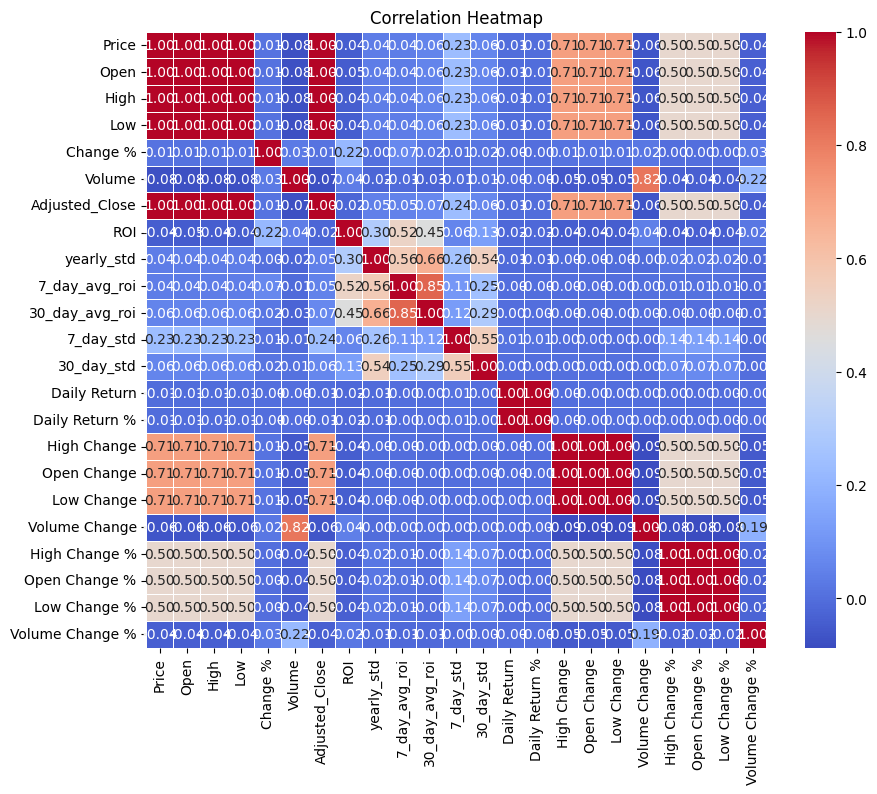

In [ ]:
correlation_matrix = df.corr()
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.corr().T

<ipython-input-360-50be2e233ef7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Price      Open      High       Low  Change %    Volume  \
Price            1.000000  0.999886  0.999949  0.999919  0.013128 -0.075405   
Open             0.999886  1.000000  0.999930  0.999929  0.008382 -0.075388   
High             0.999949  0.999930  1.000000  0.999878  0.011082 -0.075295   
Low              0.999919  0.999929  0.999878  1.000000  0.010071 -0.075451   
Change %         0.013128  0.008382  0.011082  0.010071  1.000000  0.031688   
Volume          -0.075405 -0.075388 -0.075295 -0.075451  0.031688  1.000000   
Adjusted_Close   0.999265  0.999182  0.999193  0.999258  0.012615 -0.074699   
ROI             -0.043034 -0.045949 -0.044424 -0.044250  0.216349  0.038432   
yearly_std       0.037611  0.037368  0.037307  0.037686  0.004782 -0.019710   
7_day_avg_roi    0.036614  0.035841  0.036338  0.036319  0.069461 -0.009276   
30_day_avg_roi   0.055324  0.055129  0.055383  0.055246  0.021454 -0.025490   
7_day_std        0.232519  0.232517  0.232209  0.232818  0.010070 -0.005341   
30_day_std       0.058889  0.058855  0.058527  0.059125  0.015111  0.006613   
Daily Return    -0.005602 -0.005839 -0.005787 -0.005569 -0.000265 -0.000613   
Daily Return %  -0.005602 -0.005839 -0.005787 -0.005569 -0.000265 -0.000613   
High Change      0.714038  0.713918  0.714029  0.713841  0.013090 -0.053380   
Open Change      0.714033  0.714006  0.714020  0.713917  0.011353 -0.053519   
Low Change       0.714055  0.713957  0.713983  0.713965  0.012522 -0.053526   
Volume Change   -0.064061 -0.063955 -0.063921 -0.064048  0.019718  0.816646   
High Change %    0.501304  0.500827  0.501007  0.501241  0.001764 -0.037861   
Open Change %    0.501281  0.500876  0.500981  0.501286  0.000020 -0.037899   
Low Change %     0.500120  0.499674  0.499785  0.500133  0.000761 -0.037885   
Volume Change % -0.040170 -0.040196 -0.040120 -0.040212  0.031538  0.221583   

                 Adjusted_Close       ROI  yearly_std  7_day_avg_roi  ...  \
Price                  0.999265 -0.043034    0.037611       0.036614  ...   
Open                   0.999182 -0.045949    0.037368       0.035841  ...   
High                   0.999193 -0.044424    0.037307       0.036338  ...   
Low                    0.999258 -0.044250    0.037686       0.036319  ...   
Change %               0.012615  0.216349    0.004782       0.069461  ...   
Volume                -0.074699  0.038432   -0.019710      -0.009276  ...   
Adjusted_Close         1.000000 -0.019174    0.046072       0.050155  ...   
ROI                   -0.019174  1.000000    0.295394       0.522887  ...   
yearly_std             0.046072  0.295394    1.000000       0.562816  ...   
7_day_avg_roi          0.050155  0.522887    0.562816       1.000000  ...   
30_day_avg_roi         0.067695  0.453013    0.662885       0.854397  ...   
7_day_std              0.235192  0.061419    0.259699       0.111409  ...   
30_day_std             0.062761  0.130600    0.544774       0.247520  ...   
Daily Return          -0.005814 -0.016664   -0.007663      -0.000477  ...   
Daily Return %        -0.005814 -0.016664   -0.007663      -0.000477  ...   
High Change            0.712121 -0.043832   -0.003294      -0.001725  ...   
Open Change            0.712153 -0.044801   -0.003318      -0.001731  ...   
Low Change             0.712209 -0.043603   -0.003332      -0.001759  ...   
Volume Change         -0.063248  0.042180   -0.003966       0.004339  ...   
High Change %          0.499775 -0.038684    0.019773       0.006650  ...   
Open Change %          0.499793 -0.039253    0.020267       0.007116  ...   
Low Change %           0.498661 -0.038354    0.019701       0.006786  ...   
Volume Change %       -0.039777  0.020828   -0.006771      -0.012123  ...   

                 Daily Return  Daily Return %  High Change  Open Change  \
Price               -0.005602       -0.005602     0.714038     0.714033   
Open                -0.005839       -0.005839     0.713918     0.714006   
High                -0.005787       -0.005787    

In [ ]:
df.drop(columns=['Daily Return'], inplace=True)
df.drop(columns=['Daily Return %'], inplace=True)
df.drop(columns=['High Change'], inplace=True)
df.drop(columns=['Low Change'], inplace=True)
df.drop(columns=['Open Change %'], inplace=True)
df.drop(columns=['Low Change %'], inplace=True)


In [ ]:
# Calculate standard deviation for each row
def calculate_std(row):
    return np.std(row[['Adjusted_Close', 'Open', 'High', 'Low', 'Volume']])

df['Row_SD'] = df.apply(calculate_std, axis=1)

In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-02-13   BIAT  55.19  54.76  55.19  54.76      1.66  1950.0   
2020-02-14   BIAT  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17   BIAT  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18   BIAT  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19   BIAT  57.62  57.14  57.66  57.14      0.83  5550.0   

            Adjusted_Close       ROI  yearly_std  7_day_avg_roi  \
Date                                                              
2020-02-13           55.19  0.785245    27.58452      -0.034035   
2020-02-14           55.33  0.253669    27.58452      -0.024394   
2020-02-17           56.67  1.887810    27.58452       0.181576   
2020-02-18           57.14  0.070053    27.58452       0.073216   
2020-02-19           57.62  0.840042    27.58452       0.302891   

            30_day_avg_roi  7_day_std  30_day_std  Open Change  Volume Change  \
Date                                                                            
2020-02-13       -0.120294   0.457993    0.581315         0.00         1420.0   
2020-02-14       -0.082853   0.499566    0.655125         0.43          710.0   
2020-02-17       -0.005614   0.865946    0.842445         0.43         1560.0   
2020-02-18        0.011719   1.178585    1.023653         1.48         3420.0   
2020-02-19        0.065972   1.355077    1.200761         0.04        -2090.0   

            High Change %  Volume Change %       Row_SD  
Date                                                     
2020-02-13       0.785245       267.924528   758.010024  
2020-02-14       0.742888        36.410256  1041.869011  
2020-02-17       2.338129        58.646617  1665.557116  
2020-02-18       2.108963        81.042654  3033.056024  
2020-02-19      -0.757315       -27.356021  2197.044011

In [ ]:
# Group the data by 'Valeur'
grouped_data = df.groupby('Valeur')

# Plot time series, ACF, and seasonal decomposition for each group
for valeur, group_data in grouped_data:
    # Seasonal decomposition
    decomposition = seasonal_decompose(group_data['ROI'], model='additive', period=12)  # Adjust period as needed




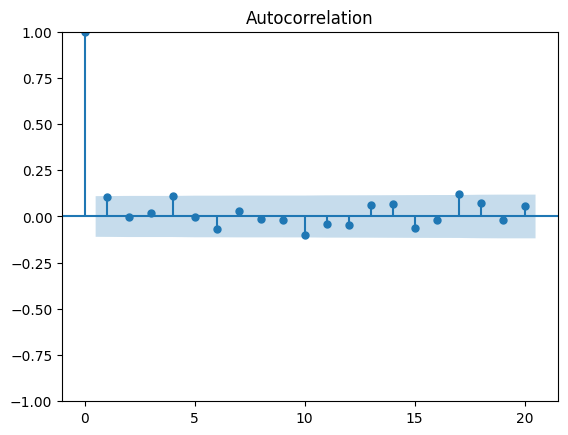

In [ ]:
   # Plot ACF
plot_acf(group_data['ROI'], lags=20).show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from ipywidgets import widgets, interactive

# Assuming df is your DataFrame containing the time series data

# Group the data by 'Valeur'
grouped_data = df.groupby('Valeur')

# Create a dropdown menu for selecting 'Valeur'
valeur_dropdown = list(grouped_data.groups.keys())

# Define a function to update the plot based on the selected 'Valeur' and component
def update_plot(selected_valeur, component):
    group_data = grouped_data.get_group(selected_valeur)

    # Seasonal decomposition
    decomposition = seasonal_decompose(group_data['ROI'], model='additive', period=12)  # Adjust period as needed

    if component == 'ACF':
        # Plot ACF
        plot_acf(group_data['ROI'], lags=20)
        plt.title(f'Autocorrelation Function for {selected_valeur}')
        plt.xlabel('Lag')
        plt.ylabel('ACF')
        plt.show()
    else:
        # Plot selected component(s)
        plt.figure(figsize=(10, 6))
        if component == 'Trend':
            plt.plot(group_data.index, decomposition.trend, label='Trend')
        if component == 'Seasonal':
            plt.plot(group_data.index, decomposition.seasonal, label='Seasonal')
        if component == 'Residuals':
            plt.plot(group_data.index, decomposition.resid, label='Residuals')
        plt.title(f'{component} for {selected_valeur}')
        plt.xlabel('Date')
        plt.ylabel('ROI')
        plt.legend()
        plt.grid(True)
        plt.show()

# Dropdowns for selecting company and component
company_selection = widgets.Dropdown(
    options=valeur_dropdown,
    value=valeur_dropdown[0],  # Set default value to the first company
    description='Select a Company:',
    disabled=False,
)

component_selection = widgets.Dropdown(
    options=['Trend', 'Seasonal', 'Residuals', 'ACF'],
    value='Trend',  # Set default value to 'Trend'
    description='Select a Component:',
    disabled=False,
)

# Display the dropdowns and register the function to be called when the dropdown values change
display(widgets.interactive(update_plot, selected_valeur=company_selection, component=component_selection))




interactive(children=(Dropdown(description='Select a Company:', options=('ASSMA', 'AST', 'ATL', 'BIAT', 'City'…

In [ ]:


# Calculate the average ROI for each "valeur" (company)
average_roi_per_valeur = df.groupby('Valeur')['ROI'].mean()
# Sort the average ROI values in descending order
sorted_average_roi = average_roi_per_valeur.sort_values(ascending=False)
# Select the top 10 most profitable companies
top_10_profitable_companies = sorted_average_roi.head(10)
# Display the top 10 most profitable companies
print("Top 10 Most Profitable Companies:")
print(top_10_profitable_companies)



Top 10 Most Profitable Companies:
Valeur
TELNET    0.188659
WIFAK     0.146131
SOMOC     0.061158
DELICE    0.033510
Star      0.012674
City     -0.034393
SOTE     -0.062684
SMG      -1.549409
SAH      -1.818483
ASSMA    -2.521783
Name: ROI, dtype: float64


In [ ]:

# Group by the company's name and calculate the capitalization for each company
capitalization = df.groupby('Valeur')['Adjusted_Close'].last() * df.groupby('Valeur')['Volume'].sum()
# Sort the capitalization values in descending order to identify the top companies
top_companies = capitalization.sort_values(ascending=False).head(10)
# Print or visualize the top companies and their capitalizations
print(top_companies)

Valeur
BIAT      338150759.0
SAH       236978196.0
DELICE     50009512.0
Star       49974400.0
WIFAK      47191741.6
UMED       43348212.3
SIAM       40269539.5
City       39452058.0
ATL        32972980.0
ICF        32632248.0
dtype: float64


In [ ]:
df["Valeur"].unique()

array(['BIAT', 'SOTE', 'UMED', 'DELICE', 'SAH', 'WIFAK', 'ICF', 'STPIL',
       'SMG', 'SOMOC', 'LNDOR', 'ATL', 'TELNET', 'City', 'SIAM', 'AST',
       'Star', 'TJL', 'UBCI', 'ASSMA'], dtype=object)

In [ ]:
# Create a dictionary to map valeur to index
valeur_index_map = {
    'WIFAK': 'TUNBANK',
    'ICF': 'TUNINDEX',
    'LNDOR': 'TUNALIM',
    'SIAM': 'TUNBAT',
    'SMG': 'TUNALIM',
    'SOMOC': 'TUNBAT',
    'SOTE': 'TUNSAC',
    'Star': 'TUNASS',
    'STPIL': 'TUNCONS',
    'TJL': 'TUNFIN',
    'TELNET': 'TUNSAC',
    'UBCI': 'TUNBANK',
    'UMED': 'TUNCONS',
    'SAH': 'TUNINPMP',
    'DELICE': 'TUNALIM',
    'BIAT': 'TUNBANK',
    'City': 'TUNSAC',
    'ATL': 'TUNFIN',
    'AST': 'TUNASS',
    'ASSMA': 'TUNASS'
}

# Map valeur to index and create the 'index' column
df['Index'] = df['Valeur'].map(valeur_index_map)


In [ ]:
import pandas as pd

# Define the mapping dictionary
mapping = {
    'WIFAK': 'TUNBANK',
    'ICF': 'TUNINDEX',
    'LNDOR': 'TUNALIM',
    'SIAM': 'TUNBAT',
    'SMG': 'TUNALIM',
    'SOMOC': 'TUNBAT',
    'SOTE': 'TUNSAC',
    'Star': 'TUNASS',
    'STPIL': 'TUNCONS',
    'TJL': 'TUNFIN',
    'TELNET': 'TUNSAC',
    'UBCI': 'TUNBANK',
    'UMED': 'TUNCONS',
    'SAH': 'TUNINPMP',
    'DELICE': 'TUNALIM',
    'BIAT': 'TUNBANK',
    'City': 'TUNSAC',
    'ATL': 'TUNFIN',
    'AST': 'TUNASS',
    'ASSMA': 'TUNASS'
}

# Convert the dictionary to a DataFrame
mapping_df = pd.DataFrame(list(mapping.items()), columns=['Company ', 'Index'])

# Display the DataFrame
print(mapping_df)


   Company      Index
0     WIFAK   TUNBANK
1       ICF  TUNINDEX
2     LNDOR   TUNALIM
3      SIAM    TUNBAT
4       SMG   TUNALIM
5     SOMOC    TUNBAT
6      SOTE    TUNSAC
7      Star    TUNASS
8     STPIL   TUNCONS
9       TJL    TUNFIN
10   TELNET    TUNSAC
11     UBCI   TUNBANK
12     UMED   TUNCONS
13      SAH  TUNINPMP
14   DELICE   TUNALIM
15     BIAT   TUNBANK
16     City    TUNSAC
17      ATL    TUNFIN
18      AST    TUNASS
19    ASSMA    TUNASS


In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-02-13   BIAT  55.19  54.76  55.19  54.76      1.66  1950.0   
2020-02-14   BIAT  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17   BIAT  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18   BIAT  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19   BIAT  57.62  57.14  57.66  57.14      0.83  5550.0   

            Adjusted_Close       ROI  yearly_std  7_day_avg_roi  \
Date                                                              
2020-02-13           55.19  0.785245    27.58452      -0.034035   
2020-02-14           55.33  0.253669    27.58452      -0.024394   
2020-02-17           56.67  1.887810    27.58452       0.181576   
2020-02-18           57.14  0.070053    27.58452       0.073216   
2020-02-19           57.62  0.840042    27.58452       0.302891   

            30_day_avg_roi  7_day_std  30_day_std  Open Change  Volume Change  \
Date                                                                            
2020-02-13       -0.120294   0.457993    0.581315         0.00         1420.0   
2020-02-14       -0.082853   0.499566    0.655125         0.43          710.0   
2020-02-17       -0.005614   0.865946    0.842445         0.43         1560.0   
2020-02-18        0.011719   1.178585    1.023653         1.48         3420.0   
2020-02-19        0.065972   1.355077    1.200761         0.04        -2090.0   

            High Change %  Volume Change %       Row_SD    Index  
Date                                                              
2020-02-13       0.785245       267.924528   758.010024  TUNBANK  
2020-02-14       0.742888        36.410256  1041.869011  TUNBANK  
2020-02-17       2.338129        58.646617  1665.557116  TUNBANK  
2020-02-18       2.108963        81.042654  3033.056024  TUNBANK  
2020-02-19      -0.757315       -27.356021  2197.044011  TUNBANK

In [ ]:
df[['Valeur', 'Price', 'Open', 'High', 'Low', 'Change %', 'Volume', 'Adjusted_Close', 'ROI', 'yearly_std', 'Index']].head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-02-13   BIAT  55.19  54.76  55.19  54.76      1.66  1950.0   
2020-02-14   BIAT  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17   BIAT  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18   BIAT  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19   BIAT  57.62  57.14  57.66  57.14      0.83  5550.0   

            Adjusted_Close       ROI  yearly_std    Index  
Date                                                       
2020-02-13           55.19  0.785245    27.58452  TUNBANK  
2020-02-14           55.33  0.253669    27.58452  TUNBANK  
2020-02-17           56.67  1.887810    27.58452  TUNBANK  
2020-02-18           57.14  0.070053    27.58452  TUNBANK  
2020-02-19           57.62  0.840042    27.58452  TUNBANK

In [ ]:
df['Index'].unique()

array(['TUNBANK', 'TUNSAC', 'TUNCONS', 'TUNALIM', 'TUNINPMP', 'TUNINDEX',
       'TUNBAT', 'TUNFIN', 'TUNASS'], dtype=object)

In [ ]:
df.columns

Index(['Valeur', 'Price', 'Open', 'High', 'Low', 'Change %', 'Volume',
       'Adjusted_Close', 'ROI', 'yearly_std', '7_day_avg_roi',
       '30_day_avg_roi', '7_day_std', '30_day_std', 'Open Change',
       'Volume Change', 'High Change %', 'Volume Change %', 'Row_SD', 'Index'],
      dtype='object')

In [ ]:
index=pd.read_csv("Combined_Indexes_1-1.csv")

In [ ]:
index['Index'].unique()

array(['TUNALIM', 'TUNASS', 'TUNBANK', 'TUNBASE', 'TUNBATIM', 'TUNCONS',
       'TUNINDEX', 'TUNDIS', 'TUNINDEX"20"', 'TUNINPMP', 'TUNSAC',
       'TUNSEFI', 'TUNFIN'], dtype=object)

In [ ]:
index.head()

Date      High     Close       Low      Open    Index    std_close  \
0  02/01/2020  9385.891  9258.853  9220.350  9374.647  TUNALIM  1136.849769   
1  03/01/2020  9400.689  9355.501  9245.532  9257.826  TUNALIM  1136.849769   
2  06/01/2020  9410.592  9270.607  9264.979  9264.340  TUNALIM  1136.849769   
3  07/01/2020  9306.529  9234.977  9210.644  9267.688  TUNALIM  1136.849769   
4  08/01/2020  9235.565  9158.477  9162.298  9234.124  TUNALIM  1136.849769   

        ROI  7_Days_Average_ROI  ROI_Monthly_Avg  Kurtosis  Skewness  \
0 -1.235183           -0.236159        -0.115782  2.737252 -0.183288   
1  1.055053           -0.236159        -0.115782  2.737252 -0.183288   
2  0.067646           -0.236159        -0.115782  2.737252 -0.183288   
3 -0.352958           -0.236159        -0.115782  2.737252 -0.183288   
4 -0.819211           -0.236159        -0.115782  2.737252 -0.183288   

   yearly_std  
0   830.67866  
1   830.67866  
2   830.67866  
3   830.67866  
4   830.67866

In [ ]:
index.head()

Date      High     Close       Low      Open    Index    std_close  \
0  02/01/2020  9385.891  9258.853  9220.350  9374.647  TUNALIM  1136.849769   
1  03/01/2020  9400.689  9355.501  9245.532  9257.826  TUNALIM  1136.849769   
2  06/01/2020  9410.592  9270.607  9264.979  9264.340  TUNALIM  1136.849769   
3  07/01/2020  9306.529  9234.977  9210.644  9267.688  TUNALIM  1136.849769   
4  08/01/2020  9235.565  9158.477  9162.298  9234.124  TUNALIM  1136.849769   

        ROI  7_Days_Average_ROI  ROI_Monthly_Avg  Kurtosis  Skewness  \
0 -1.235183           -0.236159        -0.115782  2.737252 -0.183288   
1  1.055053           -0.236159        -0.115782  2.737252 -0.183288   
2  0.067646           -0.236159        -0.115782  2.737252 -0.183288   
3 -0.352958           -0.236159        -0.115782  2.737252 -0.183288   
4 -0.819211           -0.236159        -0.115782  2.737252 -0.183288   

   yearly_std  
0   830.67866  
1   830.67866  
2   830.67866  
3   830.67866  
4   830.67866

In [ ]:
# Calculate daily returns for the stock dataset
df['stock_return'] = df['Adjusted_Close'].shift(0) / df['Adjusted_Close'].shift(1) - 1
# Drop the first row from both datasets
df.dropna(inplace=True)
index.dropna(inplace=True)

In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-02-14   BIAT  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17   BIAT  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18   BIAT  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19   BIAT  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20   BIAT  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  30_day_avg_roi  \
Date                                              ...                   
2020-02-14           55.33  0.253669    27.58452  ...       -0.082853   
2020-02-17           56.67  1.887810    27.58452  ...       -0.005614   
2020-02-18           57.14  0.070053    27.58452  ...        0.011719   
2020-02-19           57.62  0.840042    27.58452  ...        0.065972   
2020-02-20           57.61 -0.017355    27.58452  ...        0.069802   

            7_day_std  30_day_std  Open Change  Volume Change  High Change %  \
Date                                                                           
2020-02-14   0.499566    0.655125         0.43          710.0       0.742888   
2020-02-17   0.865946    0.842445         0.43         1560.0       2.338129   
2020-02-18   1.178585    1.023653         1.48         3420.0       2.108963   
2020-02-19   1.355077    1.200761         0.04        -2090.0      -0.757315   
2020-02-20   1.323201    1.333288         0.48        -2880.0       0.017343   

            Volume Change %       Row_SD    Index stock_return  
Date                                                            
2020-02-14        36.410256  1041.869011  TUNBANK     0.002537  
2020-02-17        58.646617  1665.557116  TUNBANK     0.024218  
2020-02-18        81.042654  3033.056024  TUNBANK     0.008294  
2020-02-19       -27.356021  2197.044011  TUNBANK     0.008400  
2020-02-20       -51.891892  1044.993016  TUNBANK    -0.000174  

[5 rows x 21 columns]

#PERFORMANCE INDICATORS

##BETA

In [ ]:
# Filter data from both DataFrames for the year 2020
# Convert the 'Date' column in the index DataFrame to datetime type
index['Date'] = pd.to_datetime(index['Date'])
df_2020 = df[df.index.year == 2020]
index_2020 = index[index['Date'].dt.year == 2020]

# Merge the filtered DataFrames based on the index column
merged_df_2020 = df_2020.merge(index_2020, on='Index', suffixes=('_stock', '_index'))

# Calculate daily returns for both the stock and index for the year 2020
merged_df_2020['stock_returns'] = merged_df_2020['Adjusted_Close'].pct_change()
merged_df_2020['index_returns'] = merged_df_2020['Close'].pct_change()

# Drop NaN values resulting from the calculation of returns
merged_df_2020.dropna(inplace=True)

# Define a function to calculate beta for a given set of returns
def calculate_beta(stock_returns, index_returns):
    covariance_stock_index = np.cov(stock_returns, index_returns, ddof=0)[0, 1]
    variance_index = np.var(index_returns, ddof=0)
    beta = covariance_stock_index / variance_index
    return beta

# Calculate beta for each valeur for the year 2020
beta_values_2020 = {}
for valeur, data in merged_df_2020.groupby('Valeur'):
    beta = calculate_beta(data['stock_returns'], data['index_returns'])
    beta_values_2020[valeur] = beta

# Display beta values for each valeur for the year 2020
for valeur, beta in beta_values_2020.items():
    print(f"Beta for {valeur} in 2020: {beta}")


<ipython-input-543-9d1119d78020>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



Beta for ASSMA in 2020: 1.5562184248319249
Beta for AST in 2020: 14.944442819302663
Beta for ATL in 2020: -0.9853361255712904
Beta for BIAT in 2020: 1.8583059252788041
Beta for City in 2020: -0.182280359764857
Beta for DELICE in 2020: -1.2731301522986491
Beta for ICF in 2020: 1.783184866285784
Beta for LNDOR in 2020: 1.486987635022028
Beta for SAH in 2020: -0.08775687470998061
Beta for SMG in 2020: -3.1335157884506635
Beta for SOTE in 2020: 0.318813325631049
Beta for STPIL in 2020: -0.21986521417268398
Beta for Star in 2020: -1.7103100890960323
Beta for TELNET in 2020: -0.2691895621652296
Beta for TJL in 2020: 18.303848744105593
Beta for UBCI in 2020: -0.1777711271663289
Beta for UMED in 2020: 0.16283918542384154
Beta for WIFAK in 2020: -2.855550835989389


In [ ]:
# Filter data from both DataFrames for the year 2020
# Convert the 'Date' column in the index DataFrame to datetime type
index['Date'] = pd.to_datetime(index['Date'])
df_2021 = df[df.index.year == 2021]
index_2021 = index[index['Date'].dt.year == 2021]

# Merge the filtered DataFrames based on the index column
merged_df_2021 = df_2021.merge(index_2021, on='Index', suffixes=('_stock', '_index'))

# Calculate daily returns for both the stock and index for the year 2020
merged_df_2021['stock_returns'] = merged_df_2021['Adjusted_Close'].pct_change()
merged_df_2021['index_returns'] = merged_df_2021['Close'].pct_change()

# Drop NaN values resulting from the calculation of returns
merged_df_2021.dropna(inplace=True)

# Define a function to calculate beta for a given set of returns
def calculate_beta(stock_returns, index_returns):
    covariance_stock_index = np.cov(stock_returns, index_returns, ddof=0)[0, 1]
    variance_index = np.var(index_returns, ddof=0)
    beta = covariance_stock_index / variance_index
    return beta

# Calculate beta for each valeur for the year 2020
beta_values_2021 = {}
for valeur, data in merged_df_2020.groupby('Valeur'):
    beta = calculate_beta(data['stock_returns'], data['index_returns'])
    beta_values_2021[valeur] = beta

# Display beta values for each valeur for the year 2020
for valeur, beta in beta_values_2020.items():
    print(f"Beta for {valeur} in 2021: {beta}")


Beta for ASSMA in 2021: 1.5562184248319249
Beta for AST in 2021: 14.944442819302663
Beta for ATL in 2021: -0.9853361255712904
Beta for BIAT in 2021: 1.8583059252788041
Beta for City in 2021: -0.182280359764857
Beta for DELICE in 2021: -1.2731301522986491
Beta for ICF in 2021: 1.783184866285784
Beta for LNDOR in 2021: 1.486987635022028
Beta for SAH in 2021: -0.08775687470998061
Beta for SMG in 2021: -3.1335157884506635
Beta for SOTE in 2021: 0.318813325631049
Beta for STPIL in 2021: -0.21986521417268398
Beta for Star in 2021: -1.7103100890960323
Beta for TELNET in 2021: -0.2691895621652296
Beta for TJL in 2021: 18.303848744105593
Beta for UBCI in 2021: -0.1777711271663289
Beta for UMED in 2021: 0.16283918542384154
Beta for WIFAK in 2021: -2.855550835989389


In [ ]:
# Filter data from both DataFrames for the year 2020
# Convert the 'Date' column in the index DataFrame to datetime type
index['Date'] = pd.to_datetime(index['Date'])
df_2022 = df[df.index.year == 2022]
index_2022 = index[index['Date'].dt.year == 2022]

# Merge the filtered DataFrames based on the index column
merged_df_2022 = df_2022.merge(index_2022, on='Index', suffixes=('_stock', '_index'))

# Calculate daily returns for both the stock and index for the year 2022
merged_df_2022['stock_returns'] = merged_df_2022['Adjusted_Close'].pct_change()
merged_df_2022['index_returns'] = merged_df_2022['Close'].pct_change()

# Drop NaN values resulting from the calculation of returns
merged_df_2022.dropna(inplace=True)

# Define a function to calculate beta for a given set of returns
def calculate_beta(stock_returns, index_returns):
    covariance_stock_index = np.cov(stock_returns, index_returns, ddof=0)[0, 1]
    variance_index = np.var(index_returns, ddof=0)
    beta = covariance_stock_index / variance_index
    return beta

# Calculate beta for each valeur for the year 2020
beta_values_2022 = {}
for valeur, data in merged_df_2022.groupby('Valeur'):
    beta = calculate_beta(data['stock_returns'], data['index_returns'])
    beta_values_2022[valeur] = beta

# Display beta values for each valeur for the year 2020
for valeur, beta in beta_values_2022.items():
    print(f"Beta for {valeur} in 2022: {beta}")


Beta for ASSMA in 2022: 1.1303861949721017
Beta for AST in 2022: 0.5124934487570508
Beta for ATL in 2022: 1.7211955165349428
Beta for BIAT in 2022: -12.829522644403001
Beta for City in 2022: -6.248865052798404
Beta for DELICE in 2022: 2.2230417351214418
Beta for ICF in 2022: -0.5233813008364119
Beta for LNDOR in 2022: -1.250776648858685
Beta for SAH in 2022: -0.09153572225992745
Beta for SMG in 2022: 0.5572131622892217
Beta for SOTE in 2022: 2.709158435204684
Beta for STPIL in 2022: 2.550306794165827
Beta for Star in 2022: -4.208377797772306
Beta for TELNET in 2022: -2.9635832975826033
Beta for TJL in 2022: -12.511255954817003
Beta for UBCI in 2022: -0.2926821714818687
Beta for UMED in 2022: -1.0850683949973339
Beta for WIFAK in 2022: 2.5846838183061407


In [ ]:
# Filter data from both DataFrames for the year 2020
# Convert the 'Date' column in the index DataFrame to datetime type
index['Date'] = pd.to_datetime(index['Date'])
df_2023 = df[df.index.year == 2023]
index_2023 = index[index['Date'].dt.year == 2023]

# Merge the filtered DataFrames based on the index column
merged_df_2023 = df_2023.merge(index_2023, on='Index', suffixes=('_stock', '_index'))

# Calculate daily returns for both the stock and index for the year 2020
merged_df_2023['stock_returns'] = merged_df_2023['Adjusted_Close'].pct_change()
merged_df_2023['index_returns'] = merged_df_2023['Close'].pct_change()

# Drop NaN values resulting from the calculation of returns
merged_df_2023.dropna(inplace=True)

# Define a function to calculate beta for a given set of returns
def calculate_beta(stock_returns, index_returns):
    covariance_stock_index = np.cov(stock_returns, index_returns, ddof=0)[0, 1]
    variance_index = np.var(index_returns, ddof=0)
    beta = covariance_stock_index / variance_index
    return beta

# Calculate beta for each valeur for the year 2020
beta_values_2023 = {}
for valeur, data in merged_df_2023.groupby('Valeur'):
    beta = calculate_beta(data['stock_returns'], data['index_returns'])
    beta_values_2021[valeur] = beta

# Display beta values for each valeur for the year 2020
for valeur, beta in beta_values_2023.items():
    print(f"Beta for {valeur} in 2023: {beta}")


In [ ]:
import plotly.graph_objects as go

# Define normal and abnormal beta thresholds
normal_beta_threshold = (-1.5, 1.5)

# Create a list to store trace data
traces = []

# Iterate over beta values to create scatter plot traces
for valeur, beta in beta_values_2022.items():
    color = 'green' if normal_beta_threshold[0] <= beta <= normal_beta_threshold[1] else 'red'
    trace = go.Scatter(x=[valeur], y=[beta], mode='markers', marker=dict(color=color), name=valeur)
    traces.append(trace)

# Create layout for the plot
layout = go.Layout(title='Beta Values', xaxis=dict(title='Valeur'), yaxis=dict(title='Beta'))

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


In [ ]:
# Calculate the average market return for each index
average_market_returns = index.groupby(index['Date'].dt.year)['ROI'].mean()

# Display the average market return for each index
print(average_market_returns)


Date
2020   -0.110980
2021   -0.041284
2022    0.035640
2023    0.008049
2024   -0.178377
Name: ROI, dtype: float64


##ALPHA

In [ ]:
# Define the risk-free rates for each year
risk_free_rates = {2020: 0.0625, 2021: 0.0625, 2022: 0.0725, 2023: 0.08, 2024: 0.08}
# Calculate the alpha for each company for the year 2020
alpha_values_2020 = {}
for valeur, data in merged_df_2020.groupby('Valeur'):
    # Get the beta value for the company for the year 2020
    beta = beta_values_2020[valeur]

    # Get the corresponding risk-free rate for the year 2020
    risk_free_rate = risk_free_rates[2020]

    # Get the average market return for the company's index for the year 2020
    index_name = data['Index'].iloc[0]  # Assuming each group has the same index
    average_market_return = average_market_returns.get(2020, np.nan)

    # Calculate the alpha
    stock_return = data['stock_returns'].mean()
    alpha = stock_return - (risk_free_rate + beta * (average_market_return - risk_free_rate))

    # Display formula and values used in the computation
    formula = f"Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))"
    values = f"Values: Stock Return={stock_return}, Risk-Free Rate={risk_free_rate}, Beta={beta}, Average Market Return={average_market_return}"
    print(f"Alpha for {valeur} in 2020: {alpha}")
    print("Formula:", formula)
    print("Values:", values)
    print("-" * 50)

    alpha_values_2020[valeur] = alpha


Alpha for ASSMA in 2020: 0.2053432759433926
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0021297771995446415, Risk-Free Rate=0.0625, Beta=1.5562184248319249, Average Market Return=-0.11098018043938462
--------------------------------------------------
Alpha for AST in 2020: 2.5338082887029505
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=0.003743651844258658, Risk-Free Rate=0.0625, Beta=14.944442819302663, Average Market Return=-0.11098018043938462
--------------------------------------------------
Alpha for ATL in 2020: -0.2345495177803378
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0011132289227862137, Risk-Free Rate=0.0625, Beta=-0.9853361255712904, Average Market Return=-0.11098018043938462
-----------------------------------------

In [ ]:
# Define the risk-free rates for each year
risk_free_rates = {2020: 0.0625, 2021: 0.0625, 2022: 0.0725, 2023: 0.08, 2024: 0.08}
# Calculate the alpha for each company for the year 2020
alpha_values_2021 = {}
for valeur, data in merged_df_2021.groupby('Valeur'):
    # Get the beta value for the company for the year 2020
    beta = beta_values_2021[valeur]

    # Get the corresponding risk-free rate for the year 2020
    risk_free_rate = risk_free_rates[2021]

    # Get the average market return for the company's index for the year 2020
    index_name = data['Index'].iloc[0]  # Assuming each group has the same index
    average_market_return = average_market_returns.get(2021, np.nan)

    # Calculate the alpha
    stock_return = data['stock_returns'].mean()
    alpha = stock_return - (risk_free_rate + beta * (average_market_return - risk_free_rate))

    # Display formula and values used in the computation
    formula = f"Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))"
    values = f"Values: Stock Return={stock_return}, Risk-Free Rate={risk_free_rate}, Beta={beta}, Average Market Return={average_market_return}"
    print(f"Alpha for {valeur} in 2021: {alpha}")
    print("Formula:", formula)
    print("Values:", values)
    print("-" * 50)

    alpha_values_2021[valeur] = alpha


Alpha for ASSMA in 2021: 0.12971354263034127
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0007770035721130962, Risk-Free Rate=0.0625, Beta=1.8595347088279834, Average Market Return=-0.041284320500310175
--------------------------------------------------
Alpha for AST in 2021: 0.23459812399511137
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0006832444169983584, Risk-Free Rate=0.0625, Beta=2.869232722020084, Average Market Return=-0.041284320500310175
--------------------------------------------------
Alpha for ATL in 2021: 0.19737506924113013
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.00159096298260729, Risk-Free Rate=0.0625, Beta=2.5193211360183834, Average Market Return=-0.041284320500310175
--------------------------------------

In [ ]:
# Define the risk-free rates for each year
risk_free_rates = {2020: 0.0625, 2021: 0.0625, 2022: 0.0725, 2023: 0.08, 2024: 0.08}
# Calculate the alpha for each company for the year 2020
alpha_values_2022 = {}
for valeur, data in merged_df_2020.groupby('Valeur'):
    # Get the beta value for the company for the year 2020
    beta = beta_values_2022[valeur]

    # Get the corresponding risk-free rate for the year 2020
    risk_free_rate = risk_free_rates[2022]

    # Get the average market return for the company's index for the year 2020
    index_name = data['Index'].iloc[0]  # Assuming each group has the same index
    average_market_return = average_market_returns.get(2022, np.nan)

    # Calculate the alpha
    stock_return = data['stock_returns'].mean()
    alpha = stock_return - (risk_free_rate + beta * (average_market_return - risk_free_rate))

    # Display formula and values used in the computation
    formula = f"Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))"
    values = f"Values: Stock Return={stock_return}, Risk-Free Rate={risk_free_rate}, Beta={beta}, Average Market Return={average_market_return}"
    print(f"Alpha for {valeur} in 2022: {alpha}")
    print("Formula:", formula)
    print("Values:", values)
    print("-" * 50)

    alpha_values_2020[valeur] = alpha


Alpha for ASSMA in 2022: -0.03296385630409473
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0021297771995446415, Risk-Free Rate=0.0725, Beta=1.1303861949721017, Average Market Return=0.035640101072732716
--------------------------------------------------
Alpha for AST in 2022: -0.04986589143366981
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=0.003743651844258658, Risk-Free Rate=0.0725, Beta=0.5124934487570508, Average Market Return=0.035640101072732716
--------------------------------------------------
Alpha for ATL in 2022: -0.010170136149242611
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0011132289227862137, Risk-Free Rate=0.0725, Beta=1.7211955165349428, Average Market Return=0.035640101072732716
------------------------------------

In [ ]:
# Define the risk-free rates for each year
risk_free_rates = {2020: 0.0625, 2021: 0.0625, 2022: 0.0725, 2023: 0.08, 2024: 0.08}
# Calculate the alpha for each company for the year 2020
alpha_values_2023 = {}
for valeur, data in merged_df_2023.groupby('Valeur'):
    # Get the beta value for the company for the year 2020
    beta = beta_values_2020[valeur]

    # Get the corresponding risk-free rate for the year 2020
    risk_free_rate = risk_free_rates[2023]

    # Get the average market return for the company's index for the year 2023
    index_name = data['Index'].iloc[0]  # Assuming each group has the same index
    average_market_return = average_market_returns.get(2023, np.nan)

    # Calculate the alpha
    stock_return = data['stock_returns'].mean()
    alpha = stock_return - (risk_free_rate + beta * (average_market_return - risk_free_rate))

    # Display formula and values used in the computation
    formula = f"Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))"
    values = f"Values: Stock Return={stock_return}, Risk-Free Rate={risk_free_rate}, Beta={beta}, Average Market Return={average_market_return}"
    print(f"Alpha for {valeur} in 2023: {alpha}")
    print("Formula:", formula)
    print("Values:", values)
    print("-" * 50)

    alpha_values_2020[valeur] = alpha


Alpha for ASSMA in 2023: 0.030780531084700368
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0011909878037119521, Risk-Free Rate=0.08, Beta=1.5562184248319249, Average Market Return=0.008048969796443898
--------------------------------------------------
Alpha for AST in 2023: 0.9934303812733745
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0018376753935886207, Risk-Free Rate=0.08, Beta=14.944442819302663, Average Market Return=0.008048969796443898
--------------------------------------------------
Alpha for ATL in 2023: -0.15250624078733105
Formula: Alpha = Stock Return - (Risk-Free Rate + Beta * (Average Market Return - Risk-Free Rate))
Values: Values: Stock Return=-0.0016102914556961952, Risk-Free Rate=0.08, Beta=-0.9853361255712904, Average Market Return=0.008048969796443898
------------------------------------------

##Sharp Ratio

In [ ]:
# Define the risk-free rates for each year
risk_free_rates = {2020: 0.0625, 2021: 0.0625, 2022: 0.0725, 2023: 0.08, 2024: 0.08}

def sharpe_ratio(portfolio_returns, risk_free_rate):
    """
    Calculate the Sharpe ratio for a given series of portfolio returns and risk-free rate.

    Args:
    - portfolio_returns (array-like): Array or DataFrame of portfolio returns.
    - risk_free_rate (float): Annual risk-free rate of return.

    Returns:
    - float: Sharpe ratio.
    """
    # Calculate the mean return and standard deviation of portfolio returns
    mean_portfolio_return = np.mean(portfolio_returns)* 252
    std_portfolio_return = np.std(portfolio_returns)* np.sqrt(252)

    # Calculate Sharpe ratio
    sharpe_ratio = (mean_portfolio_return - risk_free_rate) / std_portfolio_return

    return sharpe_ratio

# Calculate the Sharpe ratio for each company for the year 2023
sharpe_ratios_2023 = {}
for valeur, data in merged_df_2023.groupby('Valeur'):
    # Get the portfolio returns for the year 2023
    portfolio_returns = data['stock_returns']

    # Get the corresponding risk-free rate for the year 2023
    risk_free_rate = risk_free_rates.get(2023, np.nan)

    # Calculate the Sharpe ratio
    sharpe = sharpe_ratio(portfolio_returns, risk_free_rate)

    # Display Sharpe ratio
    print(f"Sharpe Ratio for {valeur} in 2023: {sharpe}")

    sharpe_ratios_2023[valeur] = sharpe


Sharpe Ratio for ASSMA in 2023: -0.8009901269845741
Sharpe Ratio for AST in 2023: -0.9691272400509268
Sharpe Ratio for ATL in 2023: -0.8726646227631117
Sharpe Ratio for BIAT in 2023: 0.5299795010835884
Sharpe Ratio for City in 2023: 0.7871983033440265
Sharpe Ratio for DELICE in 2023: 0.6932605467609045
Sharpe Ratio for ICF in 2023: 0.0307569013940723
Sharpe Ratio for LNDOR in 2023: -1.0696419781534525
Sharpe Ratio for SAH in 2023: -2.164874688420922
Sharpe Ratio for SMG in 2023: 0.4999109273005734
Sharpe Ratio for SOTE in 2023: -1.0712104625179664
Sharpe Ratio for STPIL in 2023: 0.7661115062892707
Sharpe Ratio for Star in 2023: 0.4354226937523021
Sharpe Ratio for TELNET in 2023: 0.2781335703609377
Sharpe Ratio for TJL in 2023: 0.8215938022767201
Sharpe Ratio for UBCI in 2023: -0.05220613077287461
Sharpe Ratio for UMED in 2023: -1.0455595760293837
Sharpe Ratio for WIFAK in 2023: -0.9940250995333668


In [ ]:
import plotly.graph_objs as go

# Extract company names and corresponding Sharpe ratios
companies = list(sharpe_ratios_2023.keys())
sharpe_values = list(sharpe_ratios_2023.values())

# Create a bar plot
trace = go.Bar(
    x=companies,
    y=sharpe_values,
    marker=dict(color='rgb(65,105,225)'),  # Specify bar color
)

layout = go.Layout(
    title='Sharpe Ratios for Companies in 2023',
    xaxis=dict(title='Company'),
    yaxis=dict(title='Sharpe Ratio'),
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [ ]:
# Calculate the Sharpe ratio for each company for the year 2022
sharpe_ratios_2022 = {}
for valeur, data in merged_df_2022.groupby('Valeur'):
    # Get the portfolio returns for the year 2022
    portfolio_returns = data['stock_returns']

    # Get the corresponding risk-free rate for the year 2022
    risk_free_rate = risk_free_rates.get(2022, np.nan)

    # Calculate the Sharpe ratio
    sharpe = sharpe_ratio(portfolio_returns, risk_free_rate)

    # Display Sharpe ratio
    print(f"Sharpe Ratio for {valeur} in 2022: {sharpe}")

    sharpe_ratios_2022[valeur] = sharpe

Sharpe Ratio for ASSMA in 2022: -0.853834207781367
Sharpe Ratio for AST in 2022: -0.8592218147291721
Sharpe Ratio for ATL in 2022: -0.8757080639453956
Sharpe Ratio for BIAT in 2022: 0.6711273785151235
Sharpe Ratio for City in 2022: 0.6784295537031102
Sharpe Ratio for DELICE in 2022: 0.7232135865274469
Sharpe Ratio for ICF in 2022: -0.0284280920268919
Sharpe Ratio for LNDOR in 2022: -1.0475902470453473
Sharpe Ratio for SAH in 2022: -0.5659422782165222
Sharpe Ratio for SMG in 2022: 0.20542365226552542
Sharpe Ratio for SOTE in 2022: -1.0451012980828542
Sharpe Ratio for STPIL in 2022: 0.7621754586337753
Sharpe Ratio for Star in 2022: 0.7542653000026656
Sharpe Ratio for TELNET in 2022: 0.4845423220031865
Sharpe Ratio for TJL in 2022: 0.8558455188802325
Sharpe Ratio for UBCI in 2022: 0.011634757605906739
Sharpe Ratio for UMED in 2022: -0.9544600147086207
Sharpe Ratio for WIFAK in 2022: -1.0284670053947078


In [ ]:
# Calculate the Sharpe ratio for each company for the year 2023
sharpe_ratios_2021 = {}
for valeur, data in merged_df_2021.groupby('Valeur'):
    # Get the portfolio returns for the year 2023
    portfolio_returns = data['stock_returns']

    # Get the corresponding risk-free rate for the year 2023
    risk_free_rate = risk_free_rates.get(2021, np.nan)

    # Calculate the Sharpe ratio
    sharpe = sharpe_ratio(portfolio_returns, risk_free_rate)

    # Display Sharpe ratio
    print(f"Sharpe Ratio for {valeur} in 2021: {sharpe}")

    sharpe_ratios_2021[valeur] = sharpe

Sharpe Ratio for ASSMA in 2021: -0.5820075143420153
Sharpe Ratio for AST in 2021: -1.0305025949269502
Sharpe Ratio for ATL in 2021: -0.7955340757893745
Sharpe Ratio for BIAT in 2021: 0.6130976135093192
Sharpe Ratio for City in 2021: 0.6869850322537655
Sharpe Ratio for DELICE in 2021: 0.5922796857840419
Sharpe Ratio for ICF in 2021: -2.921255186841536
Sharpe Ratio for LNDOR in 2021: -1.075815950701167
Sharpe Ratio for SAH in 2021: -2.5696800191314195
Sharpe Ratio for SMG in 2021: 0.6740011052294677
Sharpe Ratio for SOTE in 2021: -1.052921615178866
Sharpe Ratio for STPIL in 2021: 0.7183951459950678
Sharpe Ratio for Star in 2021: 0.8579083914384896
Sharpe Ratio for TELNET in 2021: 0.45729235029594795
Sharpe Ratio for TJL in 2021: 0.8547365172955009
Sharpe Ratio for UBCI in 2021: -0.14691683196566105
Sharpe Ratio for UMED in 2021: -1.0019705507746623
Sharpe Ratio for WIFAK in 2021: -1.0387505066187854


In [ ]:
# Calculate the Sharpe ratio for each company for the year 2020
sharpe_ratios_2020 = {}
for valeur, data in merged_df_2020.groupby('Valeur'):
    # Get the portfolio returns for the year 2020
    portfolio_returns = data['stock_returns']

    # Get the corresponding risk-free rate for the year 2020
    risk_free_rate = risk_free_rates.get(2020, np.nan)

    # Calculate the Sharpe ratio
    sharpe = sharpe_ratio(portfolio_returns, risk_free_rate)

    # Display Sharpe ratio
    print(f"Sharpe Ratio for {valeur} in 2020: {sharpe}")

    sharpe_ratios_2020[valeur] = sharpe

Sharpe Ratio for ASSMA in 2020: -1.12315703302219
Sharpe Ratio for AST in 2020: 0.13070269974032933
Sharpe Ratio for ATL in 2020: -0.7059985761747026
Sharpe Ratio for BIAT in 2020: 0.30485442091267007
Sharpe Ratio for City in 2020: 0.4252387964643732
Sharpe Ratio for DELICE in 2020: 0.46944396353880935
Sharpe Ratio for ICF in 2020: 0.004364444175060793
Sharpe Ratio for LNDOR in 2020: -1.0157639539839871
Sharpe Ratio for SAH in 2020: -0.9284039038078333
Sharpe Ratio for SMG in 2020: 0.7296135840861658
Sharpe Ratio for SOTE in 2020: -1.1182570753892467
Sharpe Ratio for STPIL in 2020: 0.06694253131023274
Sharpe Ratio for Star in 2020: 0.6004203261092403
Sharpe Ratio for TELNET in 2020: 0.5734050322365641
Sharpe Ratio for TJL in 2020: 0.903211303759847
Sharpe Ratio for UBCI in 2020: -0.11439045655751985
Sharpe Ratio for UMED in 2020: -1.4923277864302067
Sharpe Ratio for WIFAK in 2020: -1.053255800358641


In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-02-14   BIAT  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17   BIAT  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18   BIAT  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19   BIAT  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20   BIAT  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  30_day_avg_roi  \
Date                                              ...                   
2020-02-14           55.33  0.253669    27.58452  ...       -0.082853   
2020-02-17           56.67  1.887810    27.58452  ...       -0.005614   
2020-02-18           57.14  0.070053    27.58452  ...        0.011719   
2020-02-19           57.62  0.840042    27.58452  ...        0.065972   
2020-02-20           57.61 -0.017355    27.58452  ...        0.069802   

            7_day_std  30_day_std  Open Change  Volume Change  High Change %  \
Date                                                                           
2020-02-14   0.499566    0.655125         0.43          710.0       0.742888   
2020-02-17   0.865946    0.842445         0.43         1560.0       2.338129   
2020-02-18   1.178585    1.023653         1.48         3420.0       2.108963   
2020-02-19   1.355077    1.200761         0.04        -2090.0      -0.757315   
2020-02-20   1.323201    1.333288         0.48        -2880.0       0.017343   

            Volume Change %       Row_SD    Index stock_return  
Date                                                            
2020-02-14        36.410256  1041.869011  TUNBANK     0.002537  
2020-02-17        58.646617  1665.557116  TUNBANK     0.024218  
2020-02-18        81.042654  3033.056024  TUNBANK     0.008294  
2020-02-19       -27.356021  2197.044011  TUNBANK     0.008400  
2020-02-20       -51.891892  1044.993016  TUNBANK    -0.000174  

[5 rows x 21 columns]

#ENCODING

In [ ]:

# Group by "valeur" and calculate the sum of volumes
volume_grouped = df.groupby('Valeur')['Volume'].sum()

# Sort the groups by total volume in descending order
sorted_volumes = volume_grouped.sort_values(ascending=False)

# Create a mapping dictionary
mapping_dict = {valeur: rank for rank, (valeur, _) in enumerate(sorted_volumes.items(), start=1)}

# Replace the "valeur" values in the DataFrame using the mapping dictionary
df['Valeur'] = df['Valeur'].map(mapping_dict)

df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                               
2020-02-14      10  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17      10  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18      10  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19      10  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20      10  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  30_day_avg_roi  \
Date                                              ...                   
2020-02-14           55.33  0.253669    27.58452  ...       -0.082853   
2020-02-17           56.67  1.887810    27.58452  ...       -0.005614   
2020-02-18           57.14  0.070053    27.58452  ...        0.011719   
2020-02-19           57.62  0.840042    27.58452  ...        0.065972   
2020-02-20           57.61 -0.017355    27.58452  ...        0.069802   

            7_day_std  30_day_std  Open Change  Volume Change  High Change %  \
Date                                                                           
2020-02-14   0.499566    0.655125         0.43          710.0       0.742888   
2020-02-17   0.865946    0.842445         0.43         1560.0       2.338129   
2020-02-18   1.178585    1.023653         1.48         3420.0       2.108963   
2020-02-19   1.355077    1.200761         0.04        -2090.0      -0.757315   
2020-02-20   1.323201    1.333288         0.48        -2880.0       0.017343   

            Volume Change %       Row_SD    Index stock_return  
Date                                                            
2020-02-14        36.410256  1041.869011  TUNBANK     0.002537  
2020-02-17        58.646617  1665.557116  TUNBANK     0.024218  
2020-02-18        81.042654  3033.056024  TUNBANK     0.008294  
2020-02-19       -27.356021  2197.044011  TUNBANK     0.008400  
2020-02-20       -51.891892  1044.993016  TUNBANK    -0.000174  

[5 rows x 21 columns]

In [ ]:
df['Valeur'].unique()

array([10,  7,  5,  9,  2,  6, 17, 13, 20,  1, 12,  4,  8, 11,  3, 15, 19,
       18, 14, 16])

In [ ]:

# Group by "valeur" and calculate the sum of volumes
volume_grouped = df.groupby('Index')['Volume'].sum()

# Sort the groups by total volume in descending order
sorted_volumes = volume_grouped.sort_values(ascending=False)

# Create a mapping dictionary
mapping_dict = {valeur: rank for rank, (valeur, _) in enumerate(sorted_volumes.items(), start=1)}

# Replace the "valeur" values in the DataFrame using the mapping dictionary
df['Index'] = df['Index'].map(mapping_dict)

df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                               
2020-02-14      10  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17      10  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18      10  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19      10  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20      10  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  30_day_avg_roi  \
Date                                              ...                   
2020-02-14           55.33  0.253669    27.58452  ...       -0.082853   
2020-02-17           56.67  1.887810    27.58452  ...       -0.005614   
2020-02-18           57.14  0.070053    27.58452  ...        0.011719   
2020-02-19           57.62  0.840042    27.58452  ...        0.065972   
2020-02-20           57.61 -0.017355    27.58452  ...        0.069802   

            7_day_std  30_day_std  Open Change  Volume Change  High Change %  \
Date                                                                           
2020-02-14   0.499566    0.655125         0.43          710.0       0.742888   
2020-02-17   0.865946    0.842445         0.43         1560.0       2.338129   
2020-02-18   1.178585    1.023653         1.48         3420.0       2.108963   
2020-02-19   1.355077    1.200761         0.04        -2090.0      -0.757315   
2020-02-20   1.323201    1.333288         0.48        -2880.0       0.017343   

            Volume Change %       Row_SD  Index  stock_return  
Date                                                           
2020-02-14        36.410256  1041.869011      4      0.002537  
2020-02-17        58.646617  1665.557116      4      0.024218  
2020-02-18        81.042654  3033.056024      4      0.008294  
2020-02-19       -27.356021  2197.044011      4      0.008400  
2020-02-20       -51.891892  1044.993016      4     -0.000174  

[5 rows x 21 columns]

#DATA quality

Implement Automated Checks: Develop automated scripts or tools to perform regular data quality checks. These checks can include checking for missing values, outliers, duplicates, and inconsistencies. Schedule these checks to run at regular intervals or triggered by specific events.

This code defines a function data_quality_checks that performs basic data quality checks on a DataFrame:

Missing Values Check: It checks for missing values in the DataFrame and prints out the count of missing values for each column.

Duplicate Rows Check: It checks for duplicate rows in the DataFrame and prints out any duplicate rows found.

In [ ]:
def data_quality_checks(df, zscore_threshold=3):
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing Values:")
        print(missing_values)
    else:
        print("No missing values found.")

    # Check for duplicates
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
        print("\nDuplicate Rows:")
        print(duplicate_rows)
    else:
        print("\nNo duplicate rows found.")

    # Check for outliers using z-scores
    z_scores = ((df - df.mean()) / df.std()).abs()
    outliers = z_scores > zscore_threshold
    if outliers.any().any():
        print("\nOutliers (z-score > {}):".format(zscore_threshold))
        print(outliers[outliers.any(axis=1)])
    else:
        print("\nNo outliers found.")


In [ ]:
# Perform data quality checks
data_quality_checks(df)


Missing Values:
Valeur                  0
Price                   0
Open                    0
High                    0
Low                     0
Change %                0
Volume                  0
Adjusted_Close          0
ROI                     0
yearly_std              0
7_day_avg_roi           0
30_day_avg_roi          0
7_day_std               0
30_day_std              0
Open Change             0
Volume Change           0
High Change %           0
Volume Change %         0
Row_SD                  0
Index                   0
Price_Lag_Forward_1     1
Price_Lag_Backward_1    0
Price_Lag_Forward_2     2
Price_Lag_Backward_2    0
Price_Lag_Forward_3     3
Price_Lag_Backward_3    0
Price_Lag_Forward_4     4
Price_Lag_Backward_4    0
Price_Lag_Forward_5     5
Price_Lag_Backward_5    0
Price_Lag_Forward_6     6
Price_Lag_Backward_6    0
Price_Lag_Forward_7     7
Price_Lag_Backward_7    0
RSI                     0
Volatility              0
dtype: int64

No duplicate rows found.

Outliers

<ipython-input-384-712ab7d3f07d>:19: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-384-712ab7d3f07d>:19: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



#FEATURE EXTRACTION

##Lag Features

Lag features, also known as lagged features or lagged variables, involve shifting a variable's value backward or forward in time. These features are essential in time series analysis as they allow you to incorporate past observations as predictors for future values.

In [ ]:
# List to store lag periods
lag_periods = range(1, 8)

# Loop through lag periods and create lag features
for lag_period in lag_periods:
    # Shift prices forward by lag_period
    df[f'Price_Lag_Forward_{lag_period}'] = df['Adjusted_Close'].shift(-lag_period)

    # Shift prices backward by lag_period
    df[f'Price_Lag_Backward_{lag_period}'] = df['Adjusted_Close'].shift(lag_period)



In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-02-13   BIAT  55.19  54.76  55.19  54.76      1.66  1950.0   
2020-02-14   BIAT  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17   BIAT  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18   BIAT  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19   BIAT  57.62  57.14  57.66  57.14      0.83  5550.0   

            Adjusted_Close       ROI  yearly_std  ...  Price_Lag_Forward_3  \
Date                                              ...                        
2020-02-13           55.19  0.785245    27.58452  ...                57.14   
2020-02-14           55.33  0.253669    27.58452  ...                57.62   
2020-02-17           56.67  1.887810    27.58452  ...                57.61   
2020-02-18           57.14  0.070053    27.58452  ...                57.17   
2020-02-19           57.62  0.840042    27.58452  ...                57.55   

            Price_Lag_Backward_3  Price_Lag_Forward_4  Price_Lag_Backward_4  \
Date                                                                          
2020-02-13                   NaN                57.62                   NaN   
2020-02-14                   NaN                57.61                   NaN   
2020-02-17                   NaN                57.17                   NaN   
2020-02-18                 55.19                57.55                   NaN   
2020-02-19                 55.33                57.62                 55.19   

            Price_Lag_Forward_5  Price_Lag_Backward_5  Price_Lag_Forward_6  \
Date                                                                         
2020-02-13                57.61                   NaN                57.17   
2020-02-14                57.17                   NaN                57.55   
2020-02-17                57.55                   NaN                57.62   
2020-02-18                57.62                   NaN                57.38   
2020-02-19                57.38                   NaN                57.33   

            Price_Lag_Backward_6  Price_Lag_Forward_7 Price_Lag_Backward_7  
Date                                                                        
2020-02-13                   NaN                57.55                  NaN  
2020-02-14                   NaN                57.62                  NaN  
2020-02-17                   NaN                57.38                  NaN  
2020-02-18                   NaN                57.33                  NaN  
2020-02-19                   NaN                57.05                  NaN  

[5 rows x 34 columns]

In [ ]:
data_quality_checks(df)

Missing Values:
Valeur                  0
Price                   0
Open                    0
High                    0
Low                     0
Change %                0
Volume                  0
Adjusted_Close          0
ROI                     0
yearly_std              0
7_day_avg_roi           0
30_day_avg_roi          0
7_day_std               0
30_day_std              0
Open Change             0
Volume Change           0
High Change %           0
Volume Change %         0
Row_SD                  0
Index                   0
stock_return            0
Price_Lag_Forward_1     1
Price_Lag_Backward_1    1
Price_Lag_Forward_2     2
Price_Lag_Backward_2    2
Price_Lag_Forward_3     3
Price_Lag_Backward_3    3
Price_Lag_Forward_4     4
Price_Lag_Backward_4    4
Price_Lag_Forward_5     5
Price_Lag_Backward_5    5
Price_Lag_Forward_6     6
Price_Lag_Backward_6    6
Price_Lag_Forward_7     7
Price_Lag_Backward_7    7
dtype: int64

No duplicate rows found.


In [ ]:
# Impute missing values in lag columns using forward fill
lag_columns = [f'Price_Lag_Forward_{i}' for i in range(1, 8)] + [f'Price_Lag_Backward_{i}' for i in range(1, 8)]
df[lag_columns] = df[lag_columns].ffill()

In [ ]:
data_quality_checks(df)

Missing Values:
Valeur                  0
Price                   0
Open                    0
High                    0
Low                     0
Change %                0
Volume                  0
Adjusted_Close          0
ROI                     0
yearly_std              0
7_day_avg_roi           0
30_day_avg_roi          0
7_day_std               0
30_day_std              0
Open Change             0
Volume Change           0
High Change %           0
Volume Change %         0
Row_SD                  0
Index                   0
stock_return            0
Price_Lag_Forward_1     0
Price_Lag_Backward_1    1
Price_Lag_Forward_2     0
Price_Lag_Backward_2    2
Price_Lag_Forward_3     0
Price_Lag_Backward_3    3
Price_Lag_Forward_4     0
Price_Lag_Backward_4    4
Price_Lag_Forward_5     0
Price_Lag_Backward_5    5
Price_Lag_Forward_6     0
Price_Lag_Backward_6    6
Price_Lag_Forward_7     0
Price_Lag_Backward_7    7
dtype: int64

No duplicate rows found.


In [ ]:
# Impute missing values in lag columns using backward fill
df[lag_columns] = df[lag_columns].bfill()

In [ ]:
# Number of lag periods (e.g., 7 for seven-day lag)
lag_periods = 7

# Calculate daily returns based on adjusted close prices
df['Return'] = df['Adjusted_Close'].pct_change()

# Compute lagged returns for 7 days
for i in range(1, lag_periods + 1):
    df[f'Return_Lag_{i}'] = df['Return'].shift(-i)

In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                               
2020-02-14      10  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17      10  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18      10  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19      10  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20      10  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  Price_Lag_Forward_7  \
Date                                              ...                        
2020-02-14           55.33  0.253669    27.58452  ...                57.62   
2020-02-17           56.67  1.887810    27.58452  ...                57.38   
2020-02-18           57.14  0.070053    27.58452  ...                57.33   
2020-02-19           57.62  0.840042    27.58452  ...                57.05   
2020-02-20           57.61 -0.017355    27.58452  ...                56.95   

            Price_Lag_Backward_7    Return  Return_Lag_1  Return_Lag_2  \
Date                                                                     
2020-02-14                 55.33       NaN      0.024218      0.008294   
2020-02-17                 55.33  0.024218      0.008294      0.008400   
2020-02-18                 55.33  0.008294      0.008400     -0.000174   
2020-02-19                 55.33  0.008400     -0.000174     -0.007638   
2020-02-20                 55.33 -0.000174     -0.007638      0.006647   

            Return_Lag_3  Return_Lag_4  Return_Lag_5  Return_Lag_6  \
Date                                                                 
2020-02-14      0.008400     -0.000174     -0.007638      0.006647   
2020-02-17     -0.000174     -0.007638      0.006647      0.001216   
2020-02-18     -0.007638      0.006647      0.001216     -0.004165   
2020-02-19      0.006647      0.001216     -0.004165     -0.000871   
2020-02-20      0.001216     -0.004165     -0.000871     -0.004884   

            Return_Lag_7  
Date                      
2020-02-14      0.001216  
2020-02-17     -0.004165  
2020-02-18     -0.000871  
2020-02-19     -0.004884  
2020-02-20     -0.001753  

[5 rows x 43 columns]

In [ ]:
# Impute missing values using forward fill and bffil for return
df.fillna(method='ffill', inplace=True)
df["Return"].fillna(method='bfill', inplace=True)

Technical Analysis Indicators:

In [ ]:
# Calculate Simple Moving Averages (SMA)
df['SMA_10'] = df['Adjusted_Close'].rolling(window=10).mean()
df['SMA_50'] = df['Adjusted_Close'].rolling(window=50).mean()
df['SMA_200'] = df['Adjusted_Close'].rolling(window=200).mean()

df.head()


Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                               
2020-02-14      10  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17      10  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18      10  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19      10  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20      10  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  Return_Lag_1  \
Date                                              ...                 
2020-02-14           55.33  0.253669    27.58452  ...      0.024218   
2020-02-17           56.67  1.887810    27.58452  ...      0.008294   
2020-02-18           57.14  0.070053    27.58452  ...      0.008400   
2020-02-19           57.62  0.840042    27.58452  ...     -0.000174   
2020-02-20           57.61 -0.017355    27.58452  ...     -0.007638   

            Return_Lag_2  Return_Lag_3  Return_Lag_4  Return_Lag_5  \
Date                                                                 
2020-02-14      0.008294      0.008400     -0.000174     -0.007638   
2020-02-17      0.008400     -0.000174     -0.007638      0.006647   
2020-02-18     -0.000174     -0.007638      0.006647      0.001216   
2020-02-19     -0.007638      0.006647      0.001216     -0.004165   
2020-02-20      0.006647      0.001216     -0.004165     -0.000871   

            Return_Lag_6  Return_Lag_7  SMA_10  SMA_50  SMA_200  
Date                                                             
2020-02-14      0.006647      0.001216     NaN     NaN      NaN  
2020-02-17      0.001216     -0.004165     NaN     NaN      NaN  
2020-02-18     -0.004165     -0.000871     NaN     NaN      NaN  
2020-02-19     -0.000871     -0.004884     NaN     NaN      NaN  
2020-02-20     -0.004884     -0.001753     NaN     NaN      NaN  

[5 rows x 46 columns]

In [ ]:
df.fillna(method='bfill', inplace=True)

In [ ]:
# Calculate the EMA using the ewm function
df['EMA_10'] = df['Adjusted_Close'].ewm(span=10, adjust=False).mean()
df['EMA_50'] = df['Adjusted_Close'].ewm(span=50, adjust=False).mean()
df['EMA_200'] = df['Adjusted_Close'].ewm(span=200, adjust=False).mean()
df.fillna(method='bfill', inplace=True)
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                               
2020-02-14      10  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17      10  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18      10  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19      10  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20      10  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  Return_Lag_4  \
Date                                              ...                 
2020-02-14           55.33  0.253669    27.58452  ...     -0.000174   
2020-02-17           56.67  1.887810    27.58452  ...     -0.007638   
2020-02-18           57.14  0.070053    27.58452  ...      0.006647   
2020-02-19           57.62  0.840042    27.58452  ...      0.001216   
2020-02-20           57.61 -0.017355    27.58452  ...     -0.004165   

            Return_Lag_5  Return_Lag_6  Return_Lag_7  SMA_10   SMA_50  \
Date                                                                    
2020-02-14     -0.007638      0.006647      0.001216  57.142  52.1702   
2020-02-17      0.006647      0.001216     -0.004165  57.142  52.1702   
2020-02-18      0.001216     -0.004165     -0.000871  57.142  52.1702   
2020-02-19     -0.004165     -0.000871     -0.004884  57.142  52.1702   
2020-02-20     -0.000871     -0.004884     -0.001753  57.142  52.1702   

             SMA_200     EMA_10     EMA_50    EMA_200  
Date                                                   
2020-02-14  40.00675  55.330000  55.330000  55.330000  
2020-02-17  40.00675  55.573636  55.382549  55.343333  
2020-02-18  40.00675  55.858430  55.451469  55.361211  
2020-02-19  40.00675  56.178715  55.536509  55.383686  
2020-02-20  40.00675  56.438949  55.617822  55.405839  

[5 rows x 49 columns]

##RSI

In [ ]:
def calculate_rsi(df, window=14):
    delta = df['Adjusted_Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


In [ ]:
print(calculate_rsi(df,window=14))

Date
2020-02-13          NaN
2020-02-14          NaN
2020-02-17          NaN
2020-02-18          NaN
2020-02-19          NaN
                ...    
2024-01-15    31.861804
2024-01-16    44.094488
2024-01-17    42.748092
2024-01-18    29.914530
2024-01-19    33.333333
Name: Adjusted_Close, Length: 11640, dtype: float64


In [ ]:
df['RSI']=calculate_rsi(df,window=14)
df.fillna(method='bfill', inplace=True)
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                              
2020-02-13   BIAT  55.19  54.76  55.19  54.76      1.66  1950.0   
2020-02-14   BIAT  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17   BIAT  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18   BIAT  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19   BIAT  57.62  57.14  57.66  57.14      0.83  5550.0   

            Adjusted_Close       ROI  yearly_std  ...  Price_Lag_Backward_3  \
Date                                              ...                         
2020-02-13           55.19  0.785245    27.58452  ...                 55.19   
2020-02-14           55.33  0.253669    27.58452  ...                 55.19   
2020-02-17           56.67  1.887810    27.58452  ...                 55.19   
2020-02-18           57.14  0.070053    27.58452  ...                 55.19   
2020-02-19           57.62  0.840042    27.58452  ...                 55.33   

            Price_Lag_Forward_4  Price_Lag_Backward_4  Price_Lag_Forward_5  \
Date                                                                         
2020-02-13                57.62                 55.19                57.61   
2020-02-14                57.61                 55.19                57.17   
2020-02-17                57.17                 55.19                57.55   
2020-02-18                57.55                 55.19                57.62   
2020-02-19                57.62                 55.19                57.38   

            Price_Lag_Backward_5  Price_Lag_Forward_6  Price_Lag_Backward_6  \
Date                                                                          
2020-02-13                 55.19                57.17                 55.19   
2020-02-14                 55.19                57.55                 55.19   
2020-02-17                 55.19                57.62                 55.19   
2020-02-18                 55.19                57.38                 55.19   
2020-02-19                 55.19                57.33                 55.19   

            Price_Lag_Forward_7  Price_Lag_Backward_7        RSI  
Date                                                              
2020-02-13                57.55                 55.19  71.111111  
2020-02-14                57.62                 55.19  71.111111  
2020-02-17                57.38                 55.19  71.111111  
2020-02-18                57.33                 55.19  71.111111  
2020-02-19                57.05                 55.19  71.111111  

[5 rows x 35 columns]

##MACD

Moving Average Convergence Divergence (MACD): MACD is a trend-following momentum indicator that provides insights into potential trend changes.

MACD Line (the MACD): This is calculated by taking the difference between the 12-day Exponential Moving Average (EMA) and the 26-day EMA. The formula for the MACD line is:

MACD Line
=
12-day EMA
−
26-day EMA
MACD Line=12-day EMA−26-day EMA

Signal Line (the Signal): The Signal line is a 9-day EMA of the MACD line. It helps to identify potential buying or selling signals. The formula for the Signal line is:

Signal Line
=
9-day EMA of MACD Line
Signal Line=9-day EMA of MACD Line

MACD Histogram: The MACD histogram represents the difference between the MACD line and the Signal line. It is plotted as a bar chart and provides insights into the strength and direction of the trend. The formula for the MACD histogram is:

MACD Histogram
=
MACD Line
−
Signal Line
MACD Histogram=MACD Line−Signal Line

In [ ]:
import pandas as pd

# Assuming 'Close' is the column containing the closing prices of the asset
close_prices = df['Adjusted_Close']

# Calculate short-term and long-term EMAs
short_ema = close_prices.ewm(span=12, adjust=False).mean()
long_ema = close_prices.ewm(span=26, adjust=False).mean()

# Calculate MACD line
macd_line = short_ema - long_ema

# Calculate signal line
signal_line = macd_line.ewm(span=9, adjust=False).mean()

# Calculate MACD histogram
macd_histogram = macd_line - signal_line

# Add MACD components to DataFrame
df['MACD_Line'] = macd_line
df['Signal_Line'] = signal_line
df['MACD_Histogram'] = macd_histogram


In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                               
2020-02-14      10  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17      10  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18      10  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19      10  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20      10  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  SMA_10   SMA_50  \
Date                                              ...                    
2020-02-14           55.33  0.253669    27.58452  ...  57.142  52.1702   
2020-02-17           56.67  1.887810    27.58452  ...  57.142  52.1702   
2020-02-18           57.14  0.070053    27.58452  ...  57.142  52.1702   
2020-02-19           57.62  0.840042    27.58452  ...  57.142  52.1702   
2020-02-20           57.61 -0.017355    27.58452  ...  57.142  52.1702   

             SMA_200     EMA_10     EMA_50    EMA_200        RSI  MACD_Line  \
Date                                                                          
2020-02-14  40.00675  55.330000  55.330000  55.330000  67.654321   0.000000   
2020-02-17  40.00675  55.573636  55.382549  55.343333  67.654321   0.106895   
2020-02-18  40.00675  55.858430  55.451469  55.361211  67.654321   0.226919   
2020-02-19  40.00675  56.178715  55.536509  55.383686  67.654321   0.356659   
2020-02-20  40.00675  56.438949  55.617822  55.405839  67.654321   0.453446   

            Signal_Line  MACD_Histogram  
Date                                     
2020-02-14     0.000000        0.000000  
2020-02-17     0.021379        0.085516  
2020-02-18     0.062487        0.164432  
2020-02-19     0.121321        0.235338  
2020-02-20     0.187746        0.265699  

[5 rows x 53 columns]

In [ ]:
df.head()

Valeur  Price   Open   High    Low  Change %  Volume  \
Date                                                               
2020-02-14      10  55.33  55.19  55.60  55.19      0.27  2660.0   
2020-02-17      10  56.67  55.62  56.90  55.24      2.41  4220.0   
2020-02-18      10  57.14  57.10  58.10  57.10      0.84  7640.0   
2020-02-19      10  57.62  57.14  57.66  57.14      0.83  5550.0   
2020-02-20      10  57.61  57.62  57.67  57.17     -0.02  2670.0   

            Adjusted_Close       ROI  yearly_std  ...  SMA_10   SMA_50  \
Date                                              ...                    
2020-02-14           55.33  0.253669    27.58452  ...  57.142  52.1702   
2020-02-17           56.67  1.887810    27.58452  ...  57.142  52.1702   
2020-02-18           57.14  0.070053    27.58452  ...  57.142  52.1702   
2020-02-19           57.62  0.840042    27.58452  ...  57.142  52.1702   
2020-02-20           57.61 -0.017355    27.58452  ...  57.142  52.1702   

             SMA_200     EMA_10     EMA_50    EMA_200        RSI  MACD_Line  \
Date                                                                          
2020-02-14  40.00675  55.330000  55.330000  55.330000  67.654321   0.000000   
2020-02-17  40.00675  55.573636  55.382549  55.343333  67.654321   0.106895   
2020-02-18  40.00675  55.858430  55.451469  55.361211  67.654321   0.226919   
2020-02-19  40.00675  56.178715  55.536509  55.383686  67.654321   0.356659   
2020-02-20  40.00675  56.438949  55.617822  55.405839  67.654321   0.453446   

            Signal_Line  MACD_Histogram  
Date                                     
2020-02-14     0.000000        0.000000  
2020-02-17     0.021379        0.085516  
2020-02-18     0.062487        0.164432  
2020-02-19     0.121321        0.235338  
2020-02-20     0.187746        0.265699  

[5 rows x 53 columns]

In [ ]:
df.fillna(method='bfill', inplace=True)

##Volatility Measures:

In [ ]:
import numpy as np

# Assuming 'close' is a DataFrame column containing historical closing prices
# Calculate daily returns
daily_returns = df['Adjusted_Close'].pct_change()

# Compute standard deviation of returns over a specified period (e.g., 30 days)
window = 30
volatility = daily_returns.rolling(window=window).std()

# Annualize volatility
trading_days_per_year = 252  # Assuming 252 trading days in a year
annualized_volatility = volatility * np.sqrt(trading_days_per_year)

df['Volatility']=volatility * np.sqrt(trading_days_per_year)
df.fillna(method='bfill', inplace=True)



In [ ]:
df['Volatility'].groupby(df.index).head()

Date
2020-02-13    0.342495
2020-02-14    0.342495
2020-02-17    0.342495
2020-02-18    0.342495
2020-02-19    0.342495
                ...   
2024-01-15    0.070756
2024-01-16    0.082036
2024-01-17    0.082448
2024-01-18    0.082903
2024-01-19    0.083311
Name: Volatility, Length: 4027, dtype: float64

In [ ]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

#NORMALIZE DATA

*NORMALIZATION*

Model type:Neural Network

Stationarity: Time series data often needs to be stationary for accurate predictions. Stationarity means that the data's statistical properties (such as mean, variance, and autocorrelation) remain constant over time. Normalization itself doesn't make a time series stationary, but it can be combined with techniques like differencing or transformation (e.g., log or square root) to achieve stationarity.

Comparability: If you want to compare time series data from different sources or units, normalization can help put them on the same scale and make comparisons more meaningful.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Now normalized_df contains the normalized values of your original DataFrame df


In [ ]:
normalized_df.head()

Valeur     Price      Open      High       Low  Change %  \
Date                                                                     
2020-02-14  0.473684  0.313644  0.312880  0.315155  0.312880  0.458676   
2020-02-17  0.473684  0.321336  0.315348  0.322618  0.313167  0.513604   
2020-02-18  0.473684  0.324034  0.323843  0.329506  0.323843  0.473306   
2020-02-19  0.473684  0.326790  0.324073  0.326980  0.324073  0.473049   
2020-02-20  0.473684  0.326732  0.326828  0.327038  0.324245  0.451232   

              Volume  Adjusted_Close       ROI  yearly_std  ...    SMA_50  \
Date                                                        ...             
2020-02-14  0.000517        0.313644  0.687798    0.691653  ...  0.506961   
2020-02-17  0.000819        0.321336  0.754113    0.691653  ...  0.506961   
2020-02-18  0.001483        0.324034  0.680347    0.691653  ...  0.506961   
2020-02-19  0.001078        0.326790  0.711594    0.691653  ...  0.506961   
2020-02-20  0.000518        0.326732  0.676800    0.691653  ...  0.506961   

             SMA_200    EMA_10    EMA_50   EMA_200       RSI  MACD_Line  \
Date                                                                      
2020-02-14  0.745732  0.574160  0.575448  0.911564  0.703331   0.326605   
2020-02-17  0.745732  0.577049  0.576142  0.911871  0.703331   0.330161   
2020-02-18  0.745732  0.580425  0.577052  0.912283  0.703331   0.334154   
2020-02-19  0.745732  0.584223  0.578175  0.912802  0.703331   0.338470   
2020-02-20  0.745732  0.587308  0.579248  0.913312  0.703331   0.341690   

            Signal_Line  MACD_Histogram  Volatility  
Date                                                 
2020-02-14     0.329040        0.358403    0.000478  
2020-02-17     0.329852        0.362723    0.000478  
2020-02-18     0.331413        0.366709    0.000478  
2020-02-19     0.333648        0.370291    0.000478  
2020-02-20     0.336171        0.371825    0.000478  

[5 rows x 54 columns]

In [ ]:
normalized_df.shape

(11343, 54)

In [ ]:
import plotly.graph_objects as go

# Fit PCA
pca = PCA().fit(normalized_df)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create scree plot using Plotly
fig = go.Figure(data=go.Scatter(x=np.arange(1, len(cumulative_variance) + 1), y=cumulative_variance,
                                mode='lines+markers'))
fig.update_layout(title='Scree Plot',
                  xaxis_title='Number of Components',
                  yaxis_title='Cumulative Explained Variance',
                  template='plotly_white')
fig.show()


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
n_components = 39  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit PCA on your standardized data
pca.fit(normalized_df)

# Transform the data to its principal components
pca_data = pca.transform(normalized_df)

# Convert the transformed data to a DataFrame
# Convert the transformed data to a DataFrame with real feature names
pca_df = pd.DataFrame(data=pca_data, columns=normalized_df.columns[:n_components], index=normalized_df.index)


In [ ]:
pca_df.head()


Valeur     Price      Open      High       Low  Change %  \
Date                                                                     
2020-02-14  0.403001  0.827527 -0.018470  1.046891  0.796570  0.063076   
2020-02-17  0.412855  0.859910 -0.033140  1.045753  0.782426  0.071057   
2020-02-18  0.427599  0.847077 -0.016419  1.048584  0.785197  0.072459   
2020-02-19  0.430348  0.871605 -0.023866  1.042859  0.780744  0.080414   
2020-02-20  0.434012  0.872858 -0.019459  1.040723  0.784221  0.080531   

              Volume  Adjusted_Close       ROI  yearly_std  ...  \
Date                                                        ...   
2020-02-14  0.049038        0.044258 -0.042983   -0.013859  ...   
2020-02-17  0.050657        0.043731 -0.045264   -0.017604  ...   
2020-02-18  0.049267        0.045031 -0.039386   -0.017955  ...   
2020-02-19  0.051917        0.044848 -0.041614   -0.017349  ...   
2020-02-20  0.050784        0.043386 -0.042515   -0.020495  ...   

            Price_Lag_Forward_5  Price_Lag_Backward_5  Price_Lag_Forward_6  \
Date                                                                         
2020-02-14            -0.024050              0.014720            -0.000772   
2020-02-17            -0.025065              0.015238             0.000050   
2020-02-18            -0.024462              0.014491             0.000066   
2020-02-19            -0.025155              0.013701            -0.000926   
2020-02-20            -0.025577              0.012796            -0.000946   

            Price_Lag_Backward_6  Price_Lag_Forward_7  Price_Lag_Backward_7  \
Date                                                                          
2020-02-14             -0.002031            -0.008449              0.000149   
2020-02-17             -0.001552            -0.008674              0.001859   
2020-02-18             -0.001447            -0.008623              0.000589   
2020-02-19             -0.001878            -0.008232              0.000281   
2020-02-20             -0.002049            -0.007170             -0.001663   

              Return  Return_Lag_1  Return_Lag_2  Return_Lag_3  
Date                                                            
2020-02-14  0.034273      0.004526     -0.005751      0.011491  
2020-02-17  0.030686      0.053066     -0.006605      0.010076  
2020-02-18  0.032326      0.020115     -0.006235      0.013612  
2020-02-19  0.031913      0.016925     -0.009645      0.013590  
2020-02-20  0.033313     -0.001656     -0.009738      0.016237  

[5 rows x 39 columns]